# Calibration results. Stock: NVDA

In [69]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from matplotlib.lines import Line2D
import numpy as np
import pandas as pd
import statsmodels.api as sm
import random
import seaborn as sns
import scipy.stats as stats
import sys
import time
import warnings
sys.path.append('C:/Users\ornel\PycharmProjects\Margin-Loans-Pricing/functions')
sys.path.append('C:/Users/ornel/PycharmProjects/Margin-Loans-Pricing/calibration')

plt.style.use('default')
warnings.simplefilter(action='ignore', category=FutureWarning)

from MERTONpricer import Merton_pricer
from BSpricer import BS_Pricer
from KOUpricer import Kou_pricer
from VGpricer import VG_pricer
random.seed(120)

The calibration process has gone through 5 steps:
1. Calibration of model parameters based on **CALLS** option prices.
2. Calibration of model parameters based on **PUTS** option prices.
3. Calibration of model parameters based on **One-Touch-Knock-Out Daily Cliquets (OTKO)** option prices.
4. Calibration of model parameters based on a set of mixed options: **CALLS, PUTS and OTKO** prices.

Now, we are ready to visualize and analyze the results of each process. in order to decide which set of parameters fits best our pricing model.

In [70]:
#STOCK SPLIT: 4:1 ON 2021-07-20 (FROM 2016 TO DATE)

# Retrieving all dataframes for nvda stock
data = pd.read_csv('../../data/NVDA/NVDA_data.csv')            # NB. dal 20-01-2016 al 19-01-2018
calls = pd.read_csv('../../data/NVDA/NVDA_calls.csv')
puts = pd.read_csv('../../data/NVDA/NVDA_puts.csv')
otko = pd.read_csv('../../data/NVDA/nvda_otko_1year.csv')

# STOCK SPLIT ADJUSTMENT
data[['Open', 'High', 'Low', 'Close']] = 4*data[['Open', 'High', 'Low', 'Close']]
print(data)

           Date        Open        High         Low       Close    Volume  \
0    2016-01-20   26.177636   27.173578   25.826129   26.831833  48118000   
1    2016-01-21   27.124755   27.564139   26.568198   27.144281  48145600   
2    2016-01-22   27.661779   27.964467   27.603195   27.778950  25799600   
3    2016-01-25   27.769187   28.091404   27.691074   27.749659  27072800   
4    2016-01-26   27.808244   28.140225   27.525085   28.023056  22794400   
..          ...         ...         ...         ...         ...       ...   
500  2018-01-12  221.283494  222.659093  219.046898  220.669907  35991600   
501  2018-01-16  221.728866  225.153012  214.445114  217.829681  70234800   
502  2018-01-17  218.413580  222.787787  214.652944  222.391937  53840800   
503  2018-01-18  221.620002  224.292028  220.373046  222.114822  40863200   
504  2018-01-19  225.726967  228.695887  224.648263  227.726044  60938000   

      Returns  Log Returns  Returns (%)  
0         NaN          NaN       

In [71]:
# Define general parameters
T = 1
r = 0.03
q = 0
exercise = 'european'
S0 = calls.iloc[0]['UNDERLYING_LAST']
print(S0)

27.47


#### Retrieve parameters found by each calibration

In [72]:
%store -r calls_bs_params_nvda
%store -r calls_mert_params_nvda
%store -r calls_kou_params_nvda
%store -r calls_vg_params_nvda

In [73]:
%store -r puts_bs_params_nvda
%store -r puts_mert_params_nvda
%store -r puts_kou_params_nvda
%store -r puts_vg_params_nvda

In [74]:
%store -r otko_mert_params_nvda
%store -r otko_kou_params_nvda
%store -r otko_vg_params_nvda

In [75]:
%store -r mixed_mert_params_nvda
%store -r mixed_kou_params_nvda
%store -r mixed_vg_params_nvda

In [76]:
BS_1 = BS_Pricer(S0, None, T, r, q, calls_bs_params_nvda, exercise)
BS_2 = BS_Pricer(S0, None, T, r, q, puts_bs_params_nvda, exercise)

## Results that show the goodness of our calibration process
First we run the Monte Carlo simulations with the 5 sets of parameters calibrated. We simulate $10000$ paths for one year $252$  financial days. 

In [77]:
# define simulation parameters
days = 252
paths = 10000

###  Merton model

In [78]:
# SOLE CALLS
sigma, lambd, m, v = calls_mert_params_nvda
Mert1 = Merton_pricer(S0, None, T, r, q, sigma, lambd, m, v, exercise)
Smert1 = Mert1.MertonPath(days, paths)

# SOLE PUTS
sigma, lambd, m, v = puts_mert_params_nvda
Mert2 = Merton_pricer(S0, None, T, r, q, sigma, lambd, m, v, exercise)
Smert2 = Mert2.MertonPath(days, paths)

# OTKO
sigma, lambd, m, v = otko_mert_params_nvda
Mert3 = Merton_pricer(S0, None, T, r, q, sigma, lambd, m, v, exercise)
Smert3 = Mert3.MertonPath(days, paths)


# CALLS+PUTS+OTKO
sigma, lambd, m, v = mixed_mert_params_nvda
Mert4 = Merton_pricer(S0, None, T, r, q, sigma, lambd, m, v, exercise)
Smert4 = Mert4.MertonPath(days, paths)

#### 1.1 Show the Monte Carlo simulations 

In [79]:
# SHOW PARAMETERS
print(f'CALIBRATED PARAMETERS\t [σ\t\tλ\t\tm\t\tv]')
print(f'1. EUROPEAN CALLS:\t\t {calls_mert_params_nvda}')
print(f'2. EUROPEAN PUTS:\t\t {puts_mert_params_nvda}')
print(f'3. OTKO DAILY CLIQUETS:\t {otko_mert_params_nvda}')
print(f'4. CALLS + PUTS + OTKO:\t {mixed_mert_params_nvda}')

CALIBRATED PARAMETERS	 [σ		λ		m		v]
1. EUROPEAN CALLS:		 [0.2567, 1.0107, -0.078, 0.2328]
2. EUROPEAN PUTS:		 [0.3422, 1.2753, -0.1731, 0.2157]
3. OTKO DAILY CLIQUETS:	 [0.26, 2.9345, 0.0281, 0.2255]
4. CALLS + PUTS + OTKO:	 [0.314, 1.3274, -0.1268, 0.179]


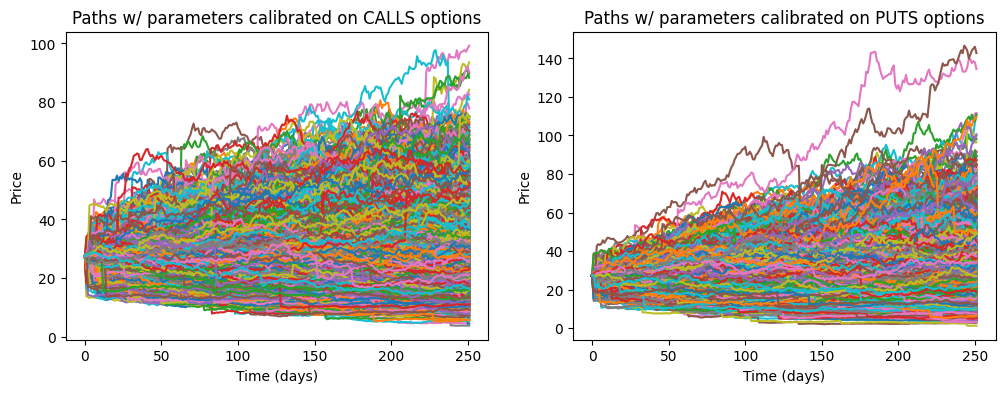

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

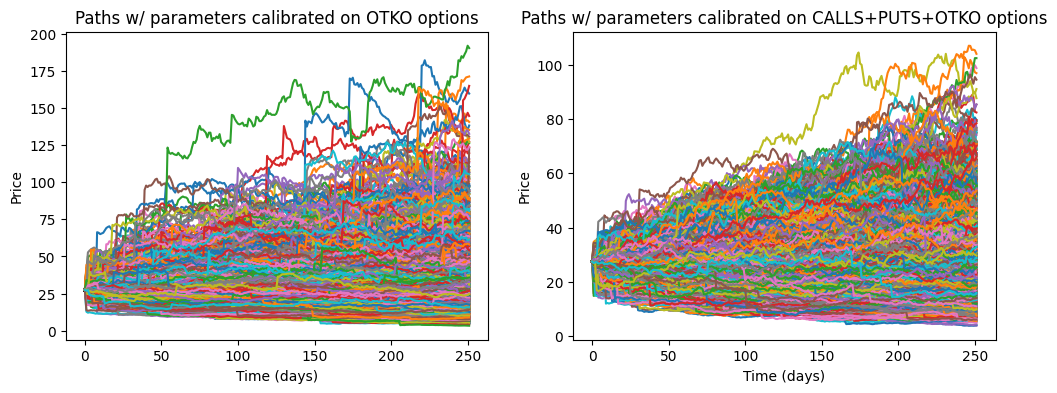

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

In [80]:
# PLOT MONTE CARLO PATHS
options = ['CALLS', 'PUTS', 'OTKO', 'CALLS+PUTS+OTKO']
fig1, axes = plt.subplots(nrows=1, ncols=2, figsize=(12,4))
for i in range(2): 
    model_ = f'Mert{i+1}'
    paths_ = f'Smert{i+1}'
    model = locals()[model_]
    paths = locals()[paths_]
    model.plotMertonPath(paths, 'NVDA', ax=axes[i])
    axes[i].set_title(f'Paths w/ parameters calibrated on {options[i]} options')

fig2, axes = plt.subplots(nrows=1, ncols=2, figsize=(12,4))
for i in range(2): 
    model_ = f'Mert{i+3}'
    paths_ = f'Smert{i+3}'
    model = locals()[model_]
    paths = locals()[paths_]
    model.plotMertonPath(paths, 'NVDA', ax=axes[i])
    axes[i].set_title(f'Paths w/ parameters calibrated on {options[i+2]} options')

plt.tight_layout()
plt.show()

#### 1.2 Show the final price distributions 

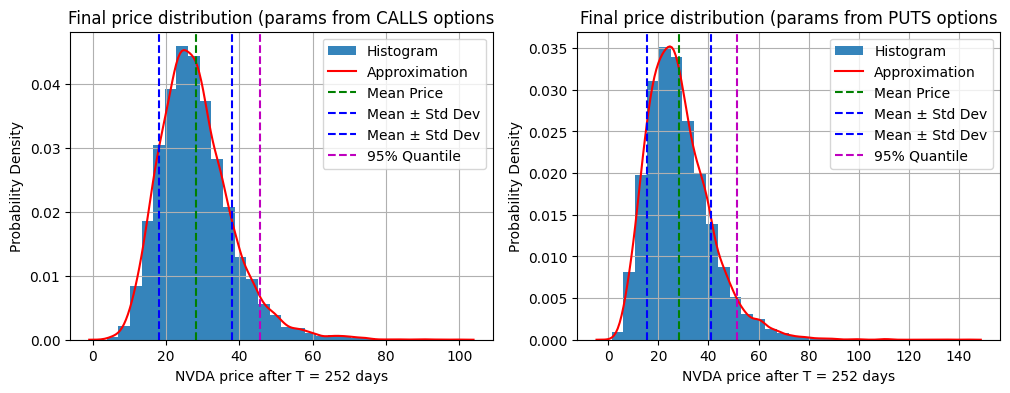

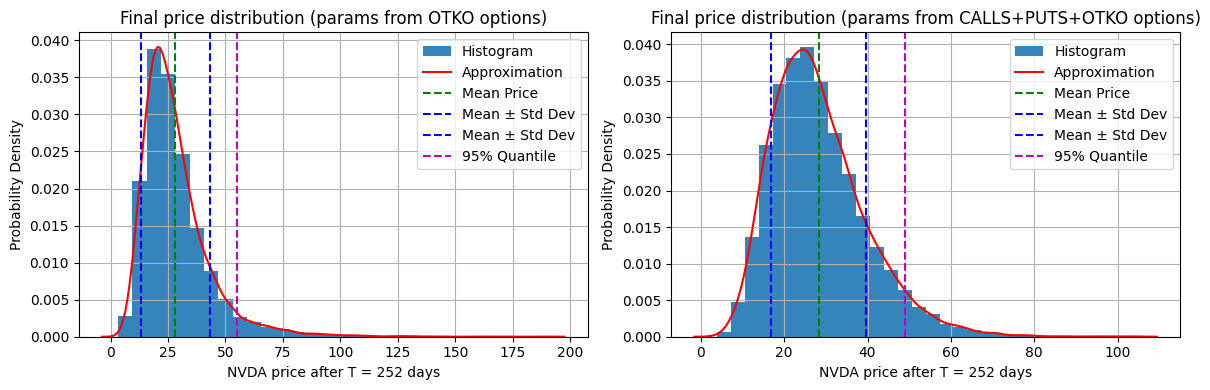

In [81]:
# PLOT FINAL PRICE DISTRIBUTIONS
fig3, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))
for i in range(2): 
    model_ = f'Mert{i+1}'
    paths_ = f'Smert{i+1}'
    model = locals()[model_]
    paths = locals()[paths_]
    model.plotMertonAtFixedTime(paths, days-1, 'NVDA', ax=axes[i])
    axes[i].set_title(f'Final price distribution (params from {options[i]} options')

fig2, axes = plt.subplots(nrows=1, ncols=2, figsize=(12,4))
for i in range(2): 
    model_ = f'Mert{i+3}'
    paths_ = f'Smert{i+3}'
    model = locals()[model_]
    paths = locals()[paths_]
    model.plotMertonAtFixedTime(paths, days-1, 'NVDA', ax=axes[i])
    axes[i].set_title(f'Final price distribution (params from {options[i+2]} options)')

plt.tight_layout()
plt.show()

#### 2.1. Reprice plain vanilla with the 3 set of parameters

In [82]:
call_prices = calls['C_Midpoint']
call_strikes = calls['STRIKE']

calls_mert_repriced_1 = np.zeros(len(call_prices))
calls_mert_repriced_3 = np.zeros(len(call_prices))
calls_mert_repriced_4 = np.zeros(len(call_prices))

for index in range(len(call_strikes)):
    calls_mert_repriced_1[index] = Mert1.closed_formula_call(call_strikes[index])  # SOLO CALLS PARAMETERS
    calls_mert_repriced_3[index] = Mert3.closed_formula_call(call_strikes[index])  # SOLO OTKO PARAMETERS
    calls_mert_repriced_4[index] = Mert4.closed_formula_call(call_strikes[index])  # MIXED CALLS+OTKO PARAMETERS

Repricing **CALLS**. The set of parameters used in our Merton Jump Diffusion will be:
1. Parameters calibrated on CALL options only
2. Parameters calibrated on OTKO options only
3. Parameters calibrated on MIXED calibration, with CALLS, PUTS and OTKO

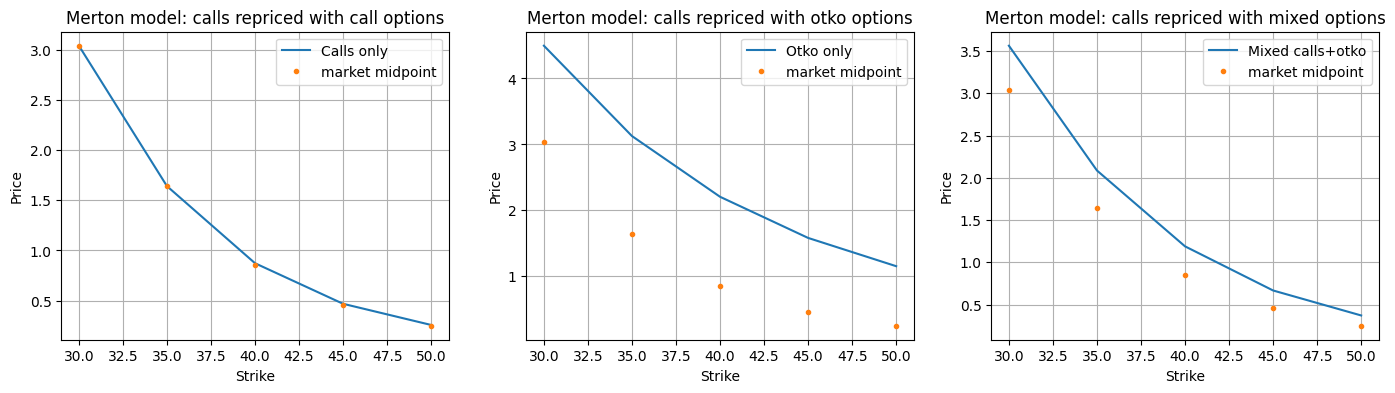

In [83]:
options = ['call', 'otko', 'mixed']
fig = plt.figure(figsize=(17, 4))
ax1 = fig.add_subplot(131)
ax2 = fig.add_subplot(132)
ax3 = fig.add_subplot(133)
ax1.plot(call_strikes, calls_mert_repriced_1, label="Calls only")
ax2.plot(call_strikes, calls_mert_repriced_3, label="Otko only")
ax3.plot(call_strikes, calls_mert_repriced_4, label="Mixed calls+otko")
for i in range(3):
    ax_ = f'ax{i+1}'
    ax = locals()[ax_]
    ax.plot(call_strikes, call_prices, ".", label="market midpoint")
    ax.set_title(f"Merton model: calls repriced with {options[i]} options")
    ax.set_xlabel("Strike")
    ax.set_ylabel('Price')
    ax.legend()
    ax.grid()
plt.show()

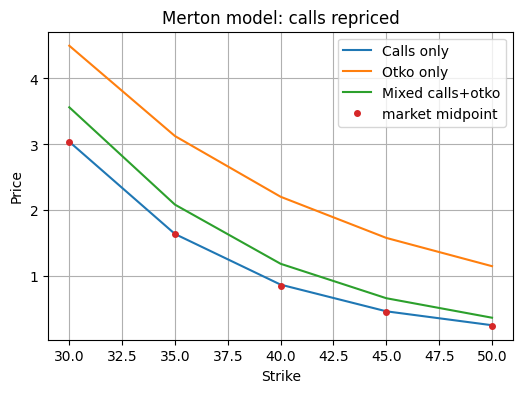

In [84]:
fig = plt.figure(figsize=(6, 4))
plt.plot(call_strikes, calls_mert_repriced_1, label="Calls only")
plt.plot(call_strikes, calls_mert_repriced_3, label="Otko only")
plt.plot(call_strikes, calls_mert_repriced_4, label="Mixed calls+otko")
plt.plot(call_strikes, call_prices, ".", label="market midpoint", markersize = 8)
plt.title("Merton model: calls repriced")
plt.xlabel("Strike")
plt.ylabel('Price')
plt.legend()
plt.grid()
plt.show()

In [85]:
put_prices = puts['P_Midpoint']
put_strikes = puts['STRIKE']

puts_mert_repriced_2 = np.zeros(len(put_prices))
puts_mert_repriced_3 = np.zeros(len(put_prices))
puts_mert_repriced_4 = np.zeros(len(put_prices))

for index in range(len(put_strikes)):
    puts_mert_repriced_2[index] = Mert2.closed_formula_put(put_strikes[index])      # SOLO CALLS PARAMETERS
    puts_mert_repriced_3[index] = Mert3.closed_formula_put(put_strikes[index])      # SOLO OTKO PARAMETERS
    puts_mert_repriced_4[index] = Mert4.closed_formula_put(put_strikes[index])      # MIXED PARAMETERS

Repricing **PUTS**. The set of parameters used in our Merton Jump Diffusion will be:
1. Parameters calibrated on **put** options only
2. Parameters calibrated on **otko** options only
3. Parameters calibrated on **mixed** calibration, with **calls**, **put** and **otko**

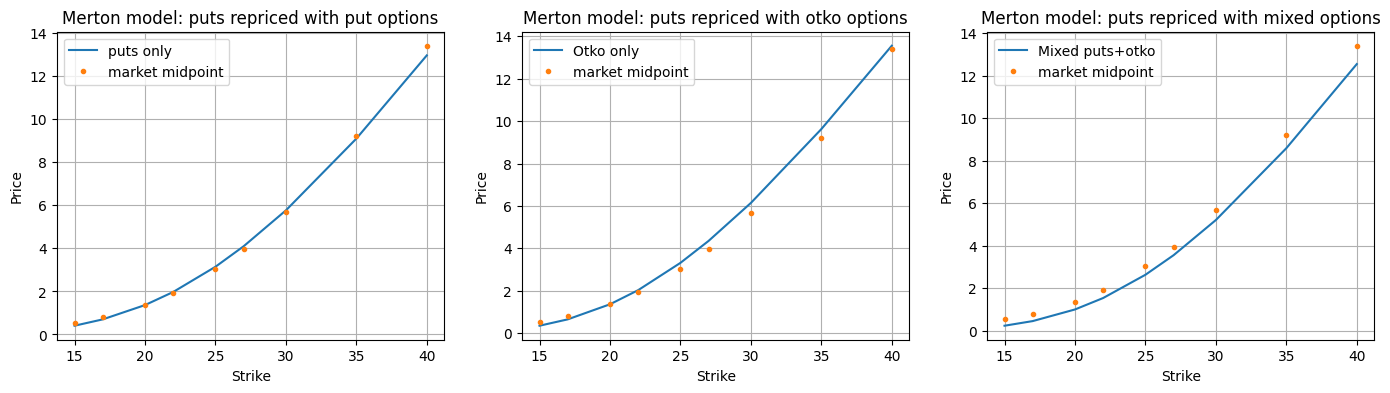

In [86]:
options = ['put', 'otko', 'mixed']
fig = plt.figure(figsize=(17, 4))
ax1 = fig.add_subplot(131)
ax2 = fig.add_subplot(132)
ax3 = fig.add_subplot(133)
ax1.plot(put_strikes, puts_mert_repriced_2, label="puts only")
ax2.plot(put_strikes, puts_mert_repriced_3, label="Otko only")
ax3.plot(put_strikes, puts_mert_repriced_4, label="Mixed puts+otko")
for i in range(3):
    ax_ = f'ax{i+1}'
    ax = locals()[ax_]
    ax.plot(put_strikes, put_prices, ".", label="market midpoint")
    ax.set_title(f"Merton model: puts repriced with {options[i]} options")
    ax.set_xlabel("Strike")
    ax.set_ylabel('Price')
    ax.legend()
    ax.grid()
plt.show()

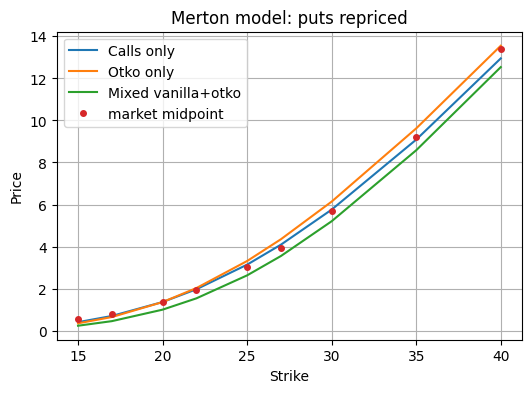

In [87]:
fig = plt.figure(figsize=(6, 4))
plt.plot(put_strikes, puts_mert_repriced_2, label="Calls only")
plt.plot(put_strikes, puts_mert_repriced_3, label="Otko only")
plt.plot(put_strikes, puts_mert_repriced_4, label="Mixed vanilla+otko")
plt.plot(put_strikes, put_prices, ".", label="market midpoint", markersize = 8)
plt.title("Merton model: puts repriced")
plt.xlabel("Strike")
plt.ylabel('Price')
plt.legend()
plt.grid()
plt.show()

#### 1.2. Reprice OTKO options with all the set of parameters

In [88]:
otko_strikes = otko[['K1', 'K2']].values / 100
otko_prices = otko['Midpoint(%)']

otko_mert_repriced_1 = np.zeros(len(otko_prices))
otko_mert_repriced_2 = np.zeros(len(otko_prices))
otko_mert_repriced_3 = np.zeros(len(otko_prices))
otko_mert_repriced_4 = np.zeros(len(otko_prices))

for index in range(len(otko_strikes)):
    otko_mert_repriced_1[index] = Mert1.closed_formula_otko(otko_strikes[index][0], otko_strikes[index][1])      # SOLO CALLS PARAMETERS
    otko_mert_repriced_2[index] = Mert2.closed_formula_otko(otko_strikes[index][0], otko_strikes[index][1])      # SOLO PUTS PARAMETERS
    otko_mert_repriced_3[index] = Mert3.closed_formula_otko(otko_strikes[index][0], otko_strikes[index][1])      # SOLO OTKO PARAMETERS
    otko_mert_repriced_4[index] = Mert4.closed_formula_otko(otko_strikes[index][0], otko_strikes[index][1])      # MIXED CALLS+PUTS+OTKO PARAMETERS
    

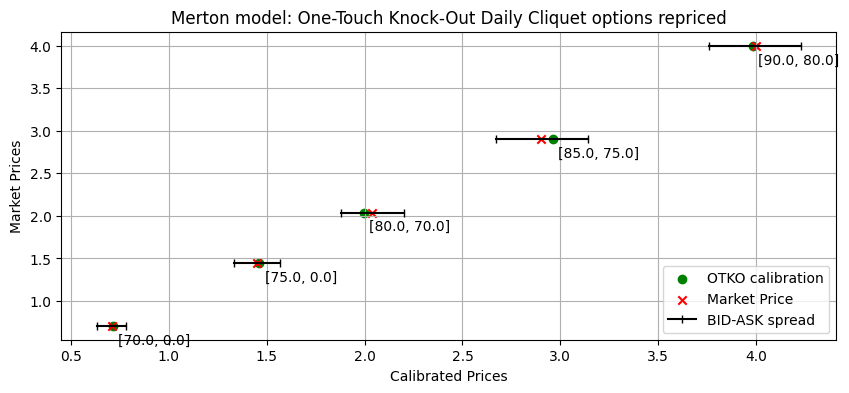

In [89]:
fig, ax = plt.subplots(figsize=(10, 4))
plt.scatter(otko_mert_repriced_3, otko_prices, label='OTKO calibration', color='green', marker='o')

# Aggiunta di etichette per i punti
for i in range(len(otko_strikes)):
    offset_x = 4
    offset_y = -13
    plt.annotate(f"[{otko_strikes[i][0]*100}, {otko_strikes[i][1]*100}]", (otko_mert_repriced_3[i], otko_prices[i]),
                 textcoords="offset points",
                 xytext=(offset_x, offset_y))

# Aggiunta di una linea di riferimento
plt.scatter(otko_prices, otko_prices, color='red', marker='x', label='Market Price')
# Plot segments between bid, ask, and calibrated prices
for i in range(len(otko_strikes)):
    plt.plot([otko['BID(%)'][i], otko['ASK(%)'][i]], [otko_prices[i], otko_prices[i]], color='black', linestyle='-', marker='|')


# Aggiunta di etichette e titoli
plt.xlabel('Calibrated Prices')
plt.ylabel('Market Prices')
plt.title('Merton model: One-Touch Knock-Out Daily Cliquet options repriced')
handles, labels = ax.get_legend_handles_labels()
line = Line2D([0], [0], label='BID-ASK spread', color='k', linestyle = '-', drawstyle='steps-post', marker='|')
handles.append(line) 
ax.legend(handles = handles, loc='lower right')
plt.grid()
# Mostra il grafico
plt.show()


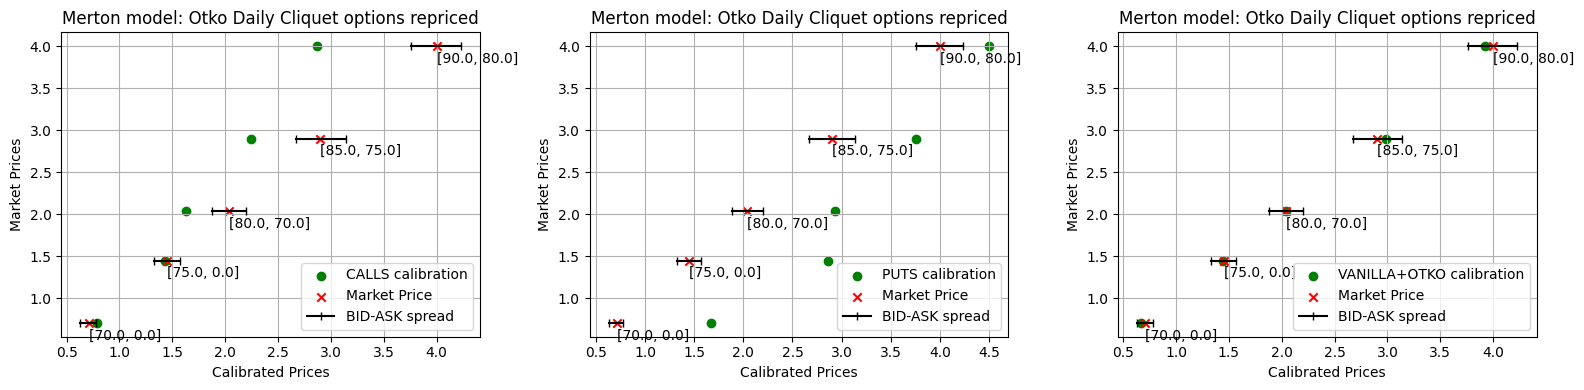

In [90]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(16,4))
ax[0].scatter(otko_mert_repriced_1, otko_prices, label='CALLS calibration', color='green', marker='o')
ax[1].scatter(otko_mert_repriced_2, otko_prices, label='PUTS calibration', color='green', marker='o')
ax[2].scatter(otko_mert_repriced_4, otko_prices, label='VANILLA+OTKO calibration', color='green', marker='o')

# Aggiunta di etichette per i punti
for i in range(3):
    # Plot reference lines and segments between bid, ask, and calibrated prices
    ax[i].scatter(otko_prices, otko_prices, color='red', marker='x', label='Market Price')
    for k in range(len(otko_strikes)):
        ax[i].plot([otko['BID(%)'][k], otko['ASK(%)'][k]], [otko_prices[k], otko_prices[k]], color='black', linestyle='-', marker='|')

    for k in range(len(otko_strikes)):
        offset_x = 0
        offset_y = -12
        ax[i].annotate(f"[{otko_strikes[k][0]*100}, {otko_strikes[k][1]*100}]", (otko_prices[k], otko_prices[k]),
                    textcoords="offset points",
                    xytext=(offset_x, offset_y))

    # Aggiunta di etichette e titoli per ogni subplot
    ax[i].set_xlabel('Calibrated Prices')
    ax[i].set_ylabel('Market Prices')
    ax[i].set_title('Merton model: Otko Daily Cliquet options repriced')
    handles, labels = ax[i].get_legend_handles_labels()
    patch = mpatches.Patch(color = 'black', linestyle='-', label= 'BID-ASK spread')
    line = Line2D([0], [0], label='BID-ASK spread', color='k', linestyle = '-', drawstyle='steps-post', marker='|')
    handles.append(line) 
    ax[i].legend(handles = handles, loc='lower right')
    ax[i].grid()

# Adjust layout
plt.tight_layout()

# Mostra il grafico
plt.show()

### Kou Jump Diffusion

In [91]:
days = 252
paths = 10000

In [92]:
# SOLE CALLS
sigma, lambd, p, eta1, eta2 = calls_kou_params_nvda
Kou1 = Kou_pricer(S0, None, T, r, sigma, lambd,p, eta1, eta2, exercise)
Skou1 = Kou1.KouPath(days, paths)

# SOLE PUT
sigma, lambd, p, eta1, eta2 = puts_kou_params_nvda
Kou2 = Kou_pricer(S0, None, T, r, sigma, lambd,p, eta1, eta2, exercise)
Skou2 = Kou2.KouPath(days, paths)

# SOLE OTKO
sigma, lambd, p, eta1, eta2 = otko_kou_params_nvda
Kou3 = Kou_pricer(S0, None, T, r, sigma, lambd,p, eta1, eta2, exercise)
Skou3 = Kou3.KouPath(days, paths)

# MIXED CALLS+OTKO
sigma, lambd, p, eta1, eta2 = mixed_kou_params_nvda
Kou4 = Kou_pricer(S0, None, T, r, sigma, lambd,p, eta1, eta2, exercise)
Skou4 = Kou4.KouPath(days, paths)

#### 1.1 Show Monte Carlo simulations

In [93]:
# SHOW PARAMETERS
print(f'CALIBRATED PARAMETERS\t [σ\t\tλ\t\tp\t\tη1\t\tη2]]')
print(f'1. EUROPEAN CALLS:\t\t {calls_kou_params_nvda}')
print(f'2. EUROPEAN PUTS:\t\t {puts_kou_params_nvda}')
print(f'3. OTKO DAILY CLIQUETS:\t {otko_kou_params_nvda}')
print(f'4. VANILLA + OTKO:\t\t {mixed_kou_params_nvda}')

CALIBRATED PARAMETERS	 [σ		λ		p		η1		η2]]
1. EUROPEAN CALLS:		 [0.3126, 0.7377, 0.4119, 8.1512, 9.9261]
2. EUROPEAN PUTS:		 [0.408, 0.8058, 0.2636, 5.9677, 8.9657]
3. OTKO DAILY CLIQUETS:	 [0.3, 4.8006, 0.4, 10.0, 5.4461]
4. VANILLA + OTKO:		 [0.0139, 3.4782, 0.282, 6.2567, 6.013]


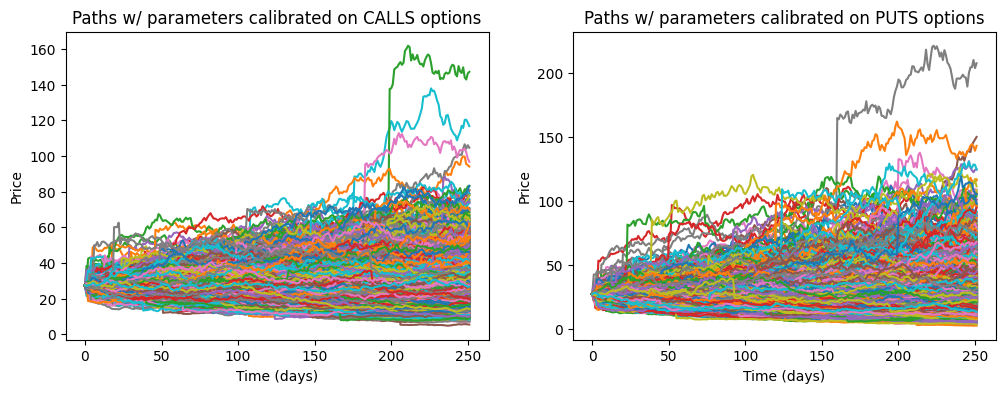

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

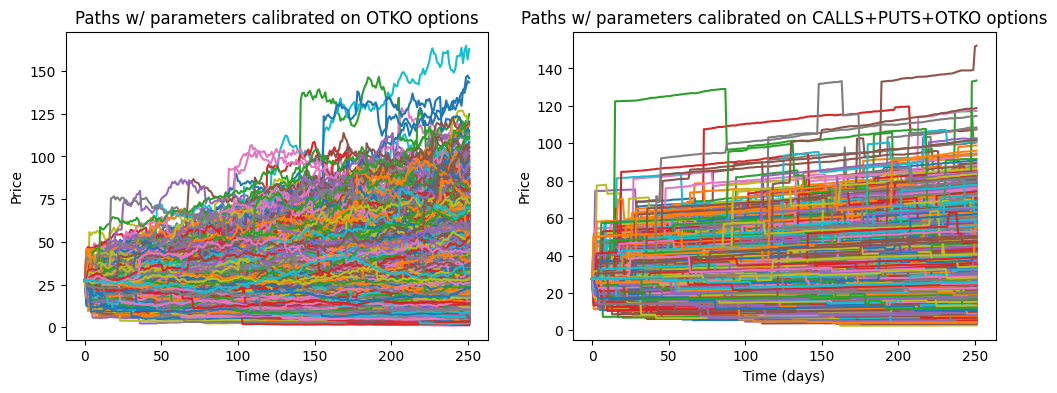

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

In [94]:
# PLOT MONTE CARLO PATHS
options = ['CALLS', 'PUTS', 'OTKO', 'CALLS+PUTS+OTKO']
fig1, axes = plt.subplots(nrows=1, ncols=2, figsize=(12,4))
for i in range(2): 
    model_ = f'Kou{i+1}'
    paths_ = f'Skou{i+1}'
    model = locals()[model_]
    paths = locals()[paths_]
    model.plotKouPath(paths, 'NVDA', ax=axes[i])
    axes[i].set_title(f'Paths w/ parameters calibrated on {options[i]} options')

fig2, axes = plt.subplots(nrows=1, ncols=2, figsize=(12,4))
for i in range(2): 
    model_ = f'Kou{i+3}'
    paths_ = f'Skou{i+3}'
    model = locals()[model_]
    paths = locals()[paths_]
    model.plotKouPath(paths, 'NVDA', ax=axes[i])
    axes[i].set_title(f'Paths w/ parameters calibrated on {options[i+2]} options')

plt.tight_layout()
plt.show()

#### 1.2 Show the final prices distributions

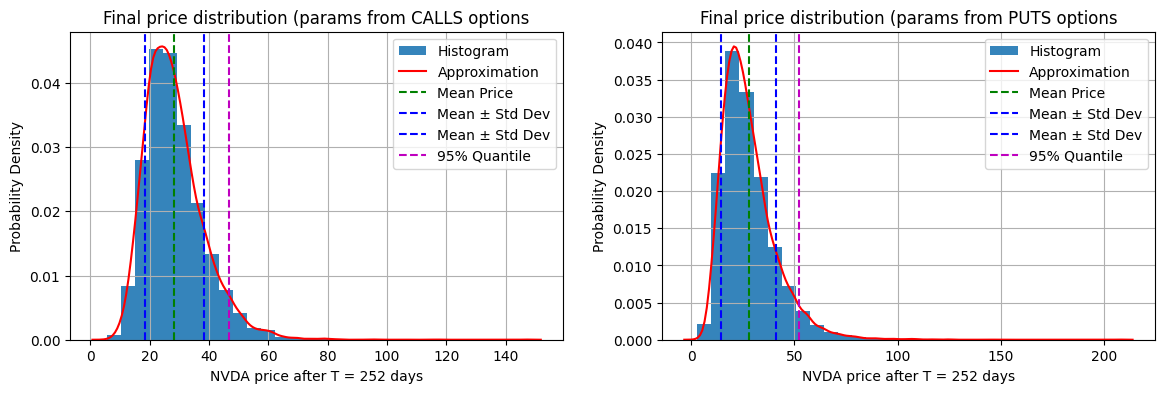

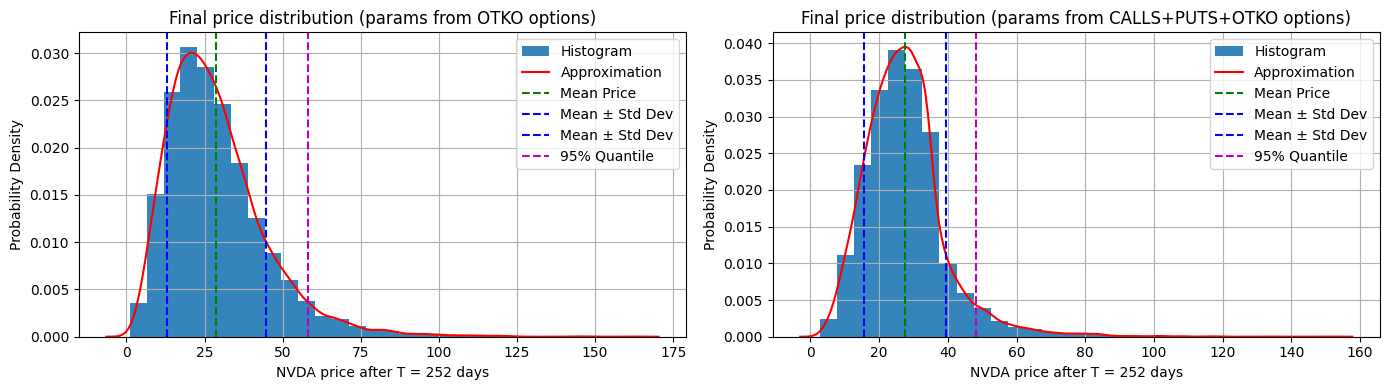

In [95]:
# PLOT FINAL PRICE DISTRIBUTIONS
fig3, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 4))
for i in range(2): 
    model_ = f'Kou{i+1}'
    paths_ = f'Skou{i+1}'
    model = locals()[model_]
    paths = locals()[paths_]
    model.plotKouAtFixedTime(paths, days-1, 'NVDA', ax=axes[i])
    axes[i].set_title(f'Final price distribution (params from {options[i]} options')

fig2, axes = plt.subplots(nrows=1, ncols=2, figsize=(14,4))
for i in range(2): 
    model_ = f'Kou{i+3}'
    paths_ = f'Skou{i+3}'
    model = locals()[model_]
    paths = locals()[paths_]
    model.plotKouAtFixedTime(paths, days-1, 'NVDA', ax=axes[i])
    axes[i].set_title(f'Final price distribution (params from {options[i+2]} options)')

plt.tight_layout()
plt.show()

#### 2.1. Reprice plain vanilla with the 3 set of parameters

In [96]:
call_prices = calls['C_Midpoint']
call_strikes = calls['STRIKE']

calls_kou_repriced_1 = np.zeros(len(call_prices))
calls_kou_repriced_3 = np.zeros(len(call_prices))
calls_kou_repriced_4 = np.zeros(len(call_prices))

for index in range(len(call_strikes)):
    calls_kou_repriced_1[index] = Kou1.closed_formula_call(call_strikes[index])  # SOLO CALLS PARAMETERS
    calls_kou_repriced_3[index] = Kou3.closed_formula_call(call_strikes[index])  # SOLO OTKO PARAMETERS
    calls_kou_repriced_4[index] = Kou4.closed_formula_call(call_strikes[index])  # MIXED CALLS+OTKO PARAMETERS

Repricing **CALLS**. The set of parameters used in our Kou Jump Diffusion will be:
1. Parameters calibrated on CALL options only
2. Parameters calibrated on OTKO options only
3. Parameters calibrated on MIXED calibration, with CALLS, PUTS and OTKO

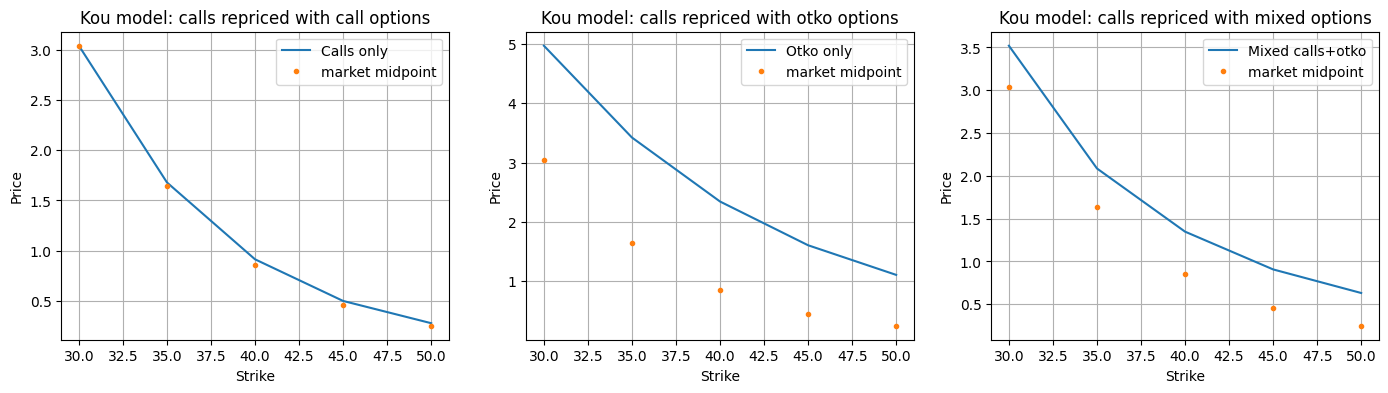

In [97]:
options = ['call', 'otko', 'mixed']

fig = plt.figure(figsize=(17, 4))
ax1 = fig.add_subplot(131)
ax2 = fig.add_subplot(132)
ax3 = fig.add_subplot(133)
ax1.plot(call_strikes, calls_kou_repriced_1, label="Calls only")
ax2.plot(call_strikes, calls_kou_repriced_3, label="Otko only")
ax3.plot(call_strikes, calls_kou_repriced_4, label="Mixed calls+otko")
for i in range(3):
    ax_ = f'ax{i+1}'
    ax = locals()[ax_]
    ax.plot(call_strikes, call_prices, ".", label="market midpoint")
    ax.set_title(f"Kou model: calls repriced with {options[i]} options")
    ax.set_xlabel("Strike")
    ax.set_ylabel('Price')
    ax.legend()
    ax.grid()
plt.show()

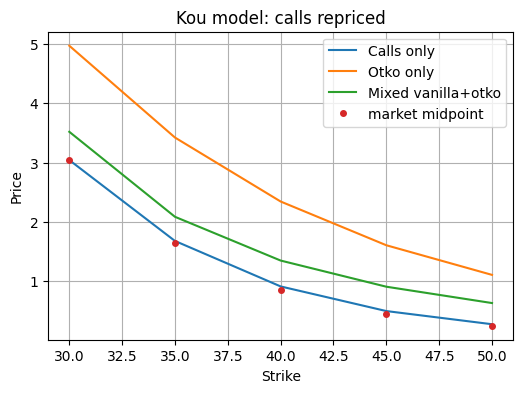

In [98]:
fig = plt.figure(figsize=(6, 4))

plt.plot(call_strikes, calls_kou_repriced_1, label="Calls only")
plt.plot(call_strikes, calls_kou_repriced_3, label="Otko only")
plt.plot(call_strikes, calls_kou_repriced_4, label="Mixed vanilla+otko")
plt.plot(call_strikes, call_prices, ".", label="market midpoint", markersize = 8)
plt.title("Kou model: calls repriced")
plt.xlabel("Strike")
plt.ylabel('Price')
plt.legend()
plt.grid()
plt.show()

In [99]:
put_prices = puts['P_Midpoint']
put_strikes = puts['STRIKE']

puts_kou_repriced_2 = np.zeros(len(put_prices))
puts_kou_repriced_3 = np.zeros(len(put_prices))
puts_kou_repriced_4 = np.zeros(len(put_prices))

for index in range(len(put_strikes)):
    puts_kou_repriced_2[index] = Kou2.closed_formula_put(put_strikes[index])      # SOLO CALLS PARAMETERS
    puts_kou_repriced_3[index] = Kou3.closed_formula_put(put_strikes[index])      # SOLO OTKO PARAMETERS
    puts_kou_repriced_4[index] = Kou4.closed_formula_put(put_strikes[index])      # MIXED CALLS+PUTS+OTKO PARAMETERS

Repricing **PUTS**. The set of parameters used in our Merton Jump Diffusion will be:
1. Parameters calibrated on **put** options only
2. Parameters calibrated on **otko** options only
3. Parameters calibrated on **mixed** calibration, with **calls**, **puts** and **otko**.

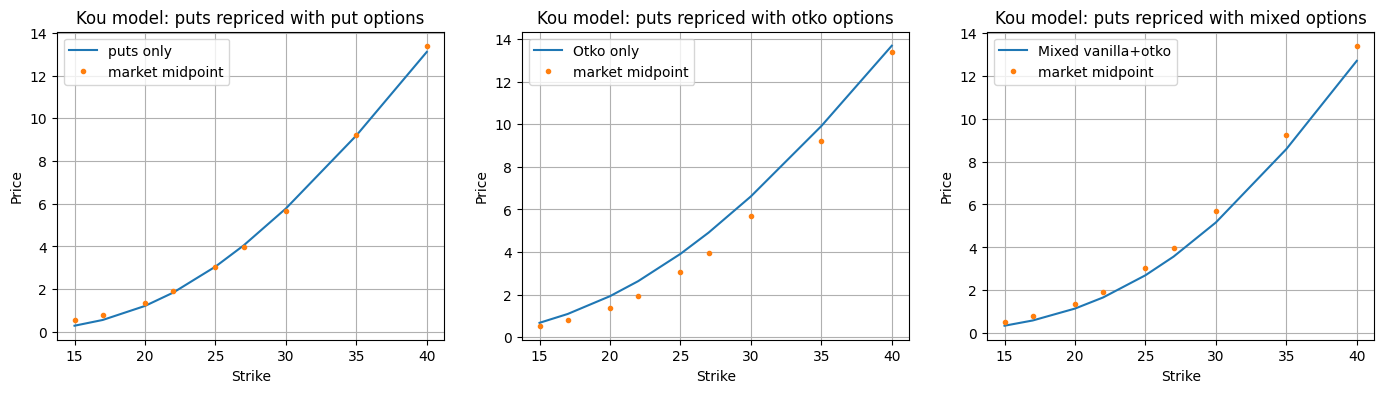

In [100]:
options = ['put', 'otko', 'mixed']

fig = plt.figure(figsize=(17, 4))
ax1 = fig.add_subplot(131)
ax2 = fig.add_subplot(132)
ax3 = fig.add_subplot(133)
ax1.plot(put_strikes, puts_kou_repriced_2, label="puts only")
ax2.plot(put_strikes, puts_kou_repriced_3, label="Otko only")
ax3.plot(put_strikes, puts_kou_repriced_4, label="Mixed vanilla+otko")
for i in range(3):
    ax_ = f'ax{i+1}'
    ax = locals()[ax_]
    ax.plot(put_strikes, put_prices, ".", label="market midpoint")
    ax.set_title(f"Kou model: puts repriced with {options[i]} options")
    ax.set_xlabel("Strike")
    ax.set_ylabel('Price')
    ax.legend()
    ax.grid()
plt.show()

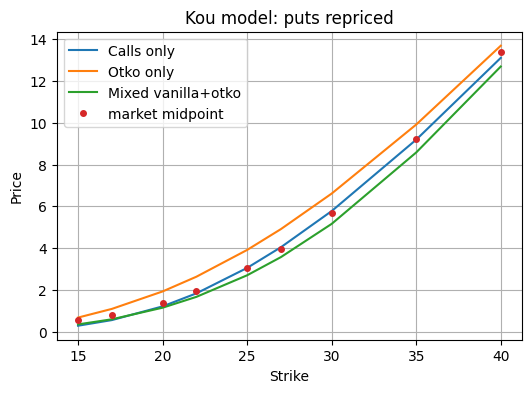

In [101]:
fig = plt.figure(figsize=(6, 4))
plt.plot(put_strikes, puts_kou_repriced_2, label="Calls only")
plt.plot(put_strikes, puts_kou_repriced_3, label="Otko only")
plt.plot(put_strikes, puts_kou_repriced_4, label="Mixed vanilla+otko")
plt.plot(put_strikes, put_prices, ".", label="market midpoint", markersize = 8)
plt.title("Kou model: puts repriced")
plt.xlabel("Strike")
plt.ylabel('Price')
plt.legend()
plt.grid()
plt.show()

#### 2.2. Reprice OTKO options with all the set of parameters


In [102]:
otko_strikes = otko[['K1', 'K2']].values / 100
otko_prices = otko['Midpoint(%)']

otko_kou_repriced_1 = np.zeros(len(otko_prices))
otko_kou_repriced_2 = np.zeros(len(otko_prices))
otko_kou_repriced_3 = np.zeros(len(otko_prices))
otko_kou_repriced_4 = np.zeros(len(otko_prices))

for index in range(len(otko_strikes)):
    otko_kou_repriced_1[index] = Kou1.closed_formula_otko(otko_strikes[index][0], otko_strikes[index][1])      # SOLO CALLS PARAMETERS
    otko_kou_repriced_2[index] = Kou2.closed_formula_otko(otko_strikes[index][0], otko_strikes[index][1])      # SOLO PUTS PARAMETERS
    otko_kou_repriced_3[index] = Kou3.closed_formula_otko(otko_strikes[index][0], otko_strikes[index][1])      # SOLO OTKO PARAMETERS
    otko_kou_repriced_4[index] = Kou4.closed_formula_otko(otko_strikes[index][0], otko_strikes[index][1])      # MIXED VANILLA+OTKO PARAMETERS

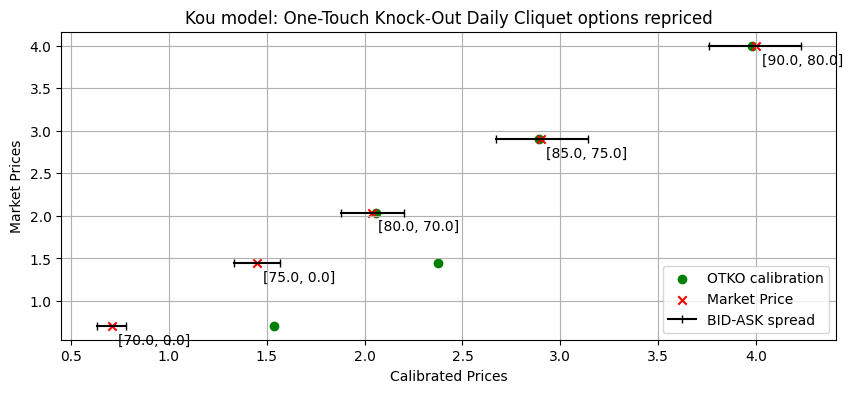

In [103]:
fig, ax = plt.subplots(figsize=(10, 4))
plt.scatter(otko_kou_repriced_3, otko_prices, label='OTKO calibration', color='green', marker='o')

# Aggiunta di una linea di riferimento
plt.scatter(otko_prices, otko_prices, color='red', marker='x', label='Market Price')

# Aggiunta di etichette per i punti
for i in range(len(otko_strikes)):
    offset_x = 4
    offset_y = -13
    plt.annotate(f"[{otko_strikes[i][0]*100}, {otko_strikes[i][1]*100}]", (otko_prices[i], otko_prices[i]),
                 textcoords="offset points",
                 xytext=(offset_x, offset_y))

# Plot segments between bid, ask, and calibrated prices
for i in range(len(otko_strikes)):
    plt.plot([otko['BID(%)'][i], otko['ASK(%)'][i]], [otko_prices[i], otko_prices[i]], color='black', linestyle='-', marker='|')


# Aggiunta di etichette e titoli
plt.xlabel('Calibrated Prices')
plt.ylabel('Market Prices')
plt.title('Kou model: One-Touch Knock-Out Daily Cliquet options repriced')
handles, labels = ax.get_legend_handles_labels()
line = Line2D([0], [0], label='BID-ASK spread', color='k', linestyle = '-', drawstyle='steps-post', marker='|')
handles.append(line) 
ax.legend(handles = handles, loc='lower right')
plt.grid()

# Mostra il grafico
plt.show()

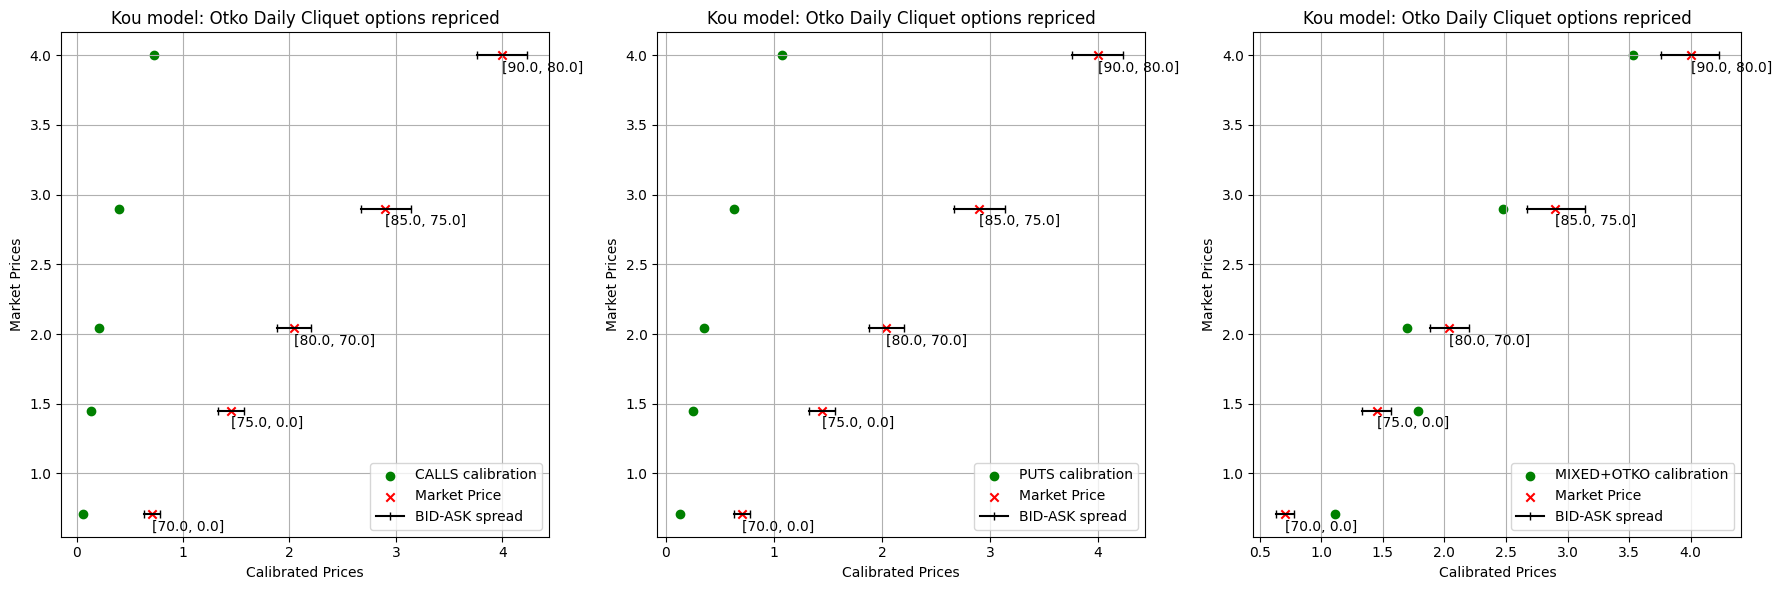

In [104]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18,6))
axes[0].scatter(otko_kou_repriced_1, otko_prices, label='CALLS calibration', color='green', marker='o')
axes[1].scatter(otko_kou_repriced_2, otko_prices, label='PUTS calibration', color='green', marker='o')
axes[2].scatter(otko_kou_repriced_4, otko_prices, label='MIXED+OTKO calibration', color='green', marker='o')

# Aggiunta di etichette per i punti
for i in range(3):
    ax = axes[i]  # Get the current axis

    # Plot reference lines and segments between bid, ask, and calibrated prices
    ax.scatter(otko_prices, otko_prices, color='red', marker='x', label='Market Price')
    for k in range(len(otko_strikes)):
        ax.plot([otko['BID(%)'][k], otko['ASK(%)'][k]], [otko_prices[k], otko_prices[k]], color='black', linestyle='-', marker='|')

    for k in range(len(otko_strikes)):
        offset_x = 0
        offset_y = -12
        ax.annotate(f"[{otko_strikes[k][0]*100}, {otko_strikes[k][1]*100}]", (otko_prices[k], otko_prices[k]),
                    textcoords="offset points",
                    xytext=(offset_x, offset_y))

    # Aggiunta di etichette e titoli per ogni subplot
    ax.set_xlabel('Calibrated Prices')
    ax.set_ylabel('Market Prices')
    ax.set_title('Kou model: Otko Daily Cliquet options repriced')
    handles, labels = ax.get_legend_handles_labels()
    patch = mpatches.Patch(color = 'black', linestyle='-', label= 'BID-ASK spread')
    line = Line2D([0], [0], label='BID-ASK spread', color='k', linestyle = '-', drawstyle='steps-post', marker='|')
    handles.append(line) 
    ax.legend(handles = handles, loc='lower right')
    ax.grid()

# Adjust layout
plt.tight_layout()

# Mostra il grafico
plt.show()

### Variance Gamma Process

In [105]:
days = 252
paths = 10000

In [106]:
# SOLE CALLS
sigm, theta, nu = calls_vg_params_nvda
VG1 = VG_pricer(S0, None, T, r, q, sigm, theta, nu, exercise)
Svg1 = VG1.VarianceGammaPath1(days, paths)

# SOLE PUTS
sigm, theta, nu = puts_vg_params_nvda
VG2 = VG_pricer(S0, None, T, r, q, sigm, theta, nu, exercise)
Svg2 = VG2.VarianceGammaPath1(days, paths)

# OTKO
sigm, theta, nu = otko_vg_params_nvda
VG3 = VG_pricer(S0, None, T, r, q, sigm, theta, nu, exercise)
Svg3 = VG3.VarianceGammaPath1(days, paths)

# VANILLA+OTKO
sigm, theta, nu = mixed_vg_params_nvda
VG4 = VG_pricer(S0, None, T, r, q, sigm, theta, nu, exercise)
Svg4 = VG4.VarianceGammaPath1(days, paths)

#### 1.1 Show Monte Carlo simulations

In [107]:
# SHOW PARAMETERS
print(f'CALIBRATED PARAMETERS\t [σ\t\tθ\t\tv]')
print(f'1. EUROPEAN CALLS:\t\t {calls_vg_params_nvda}')
print(f'2. EUROPEAN PUTS:\t\t {puts_vg_params_nvda}')
print(f'3. OTKO DAILY CLIQUETS:\t {otko_vg_params_nvda}')
print(f'4. CALLS+PUTS+OTKO:\t\t {mixed_vg_params_nvda}')

CALIBRATED PARAMETERS	 [σ		θ		v]
1. EUROPEAN CALLS:		 [0.3492, 0.1579, 0.2349]
2. EUROPEAN PUTS:		 [0.4618, 0.1306, 0.4922]
3. OTKO DAILY CLIQUETS:	 [0.4737, 0.1965, 0.3018]
4. CALLS+PUTS+OTKO:		 [0.2776, -0.15, 1.7989]


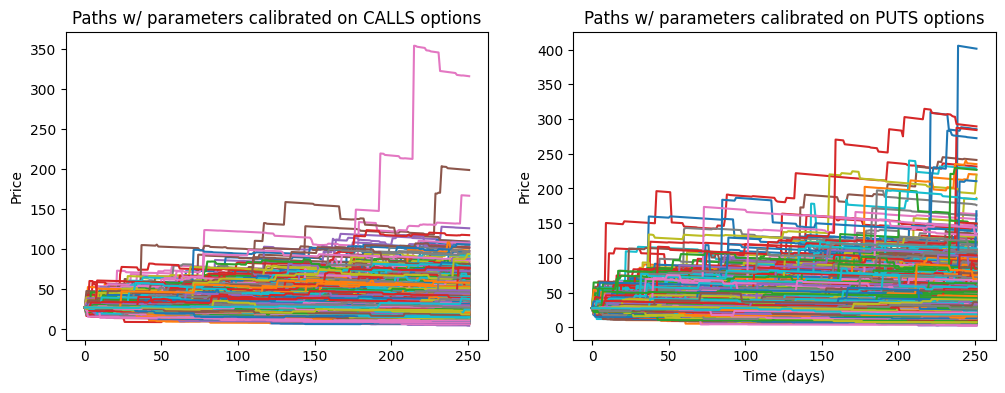

<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

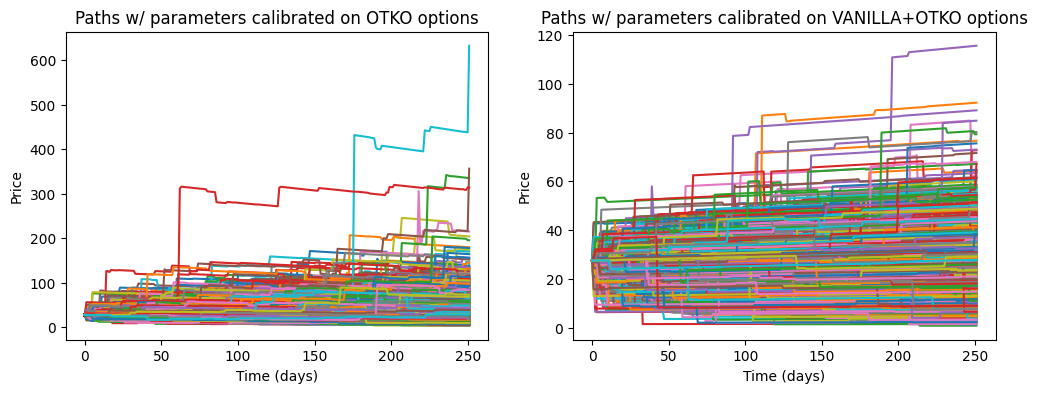

<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

In [108]:
# PLOT MONTE CARLO PATHS
options = ['CALLS', 'PUTS', 'OTKO', 'VANILLA+OTKO']
fig1, axes = plt.subplots(nrows=1, ncols=2, figsize=(12,4))
for i in range(2): 
    model_ = f'VG{i+1}'
    paths_ = f'Svg{i+1}'
    model = locals()[model_]
    paths = locals()[paths_]
    model.plotVGPath(paths, 'NVDA', method='Time changed BM', ax=axes[i])
    axes[i].set_title(f'Paths w/ parameters calibrated on {options[i]} options')

fig2, axes = plt.subplots(nrows=1, ncols=2, figsize=(12,4))
for i in range(2): 
    model_ = f'VG{i+3}'
    paths_ = f'Svg{i+3}'
    model = locals()[model_]
    paths = locals()[paths_]
    model.plotVGPath(paths, 'NVDA', method='Time changed BM', ax=axes[i])
    axes[i].set_title(f'Paths w/ parameters calibrated on {options[i+2]} options')

plt.tight_layout()
plt.show()

#### 1.2 Show the final prices distribution

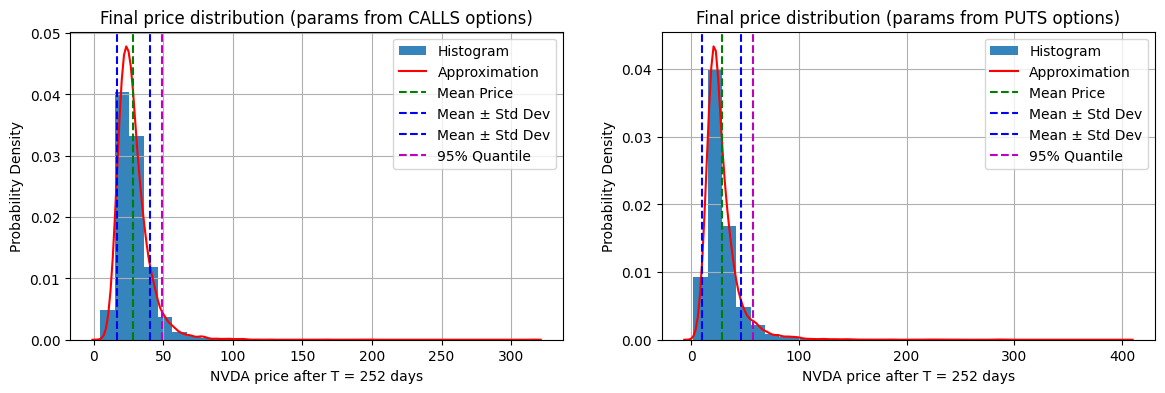

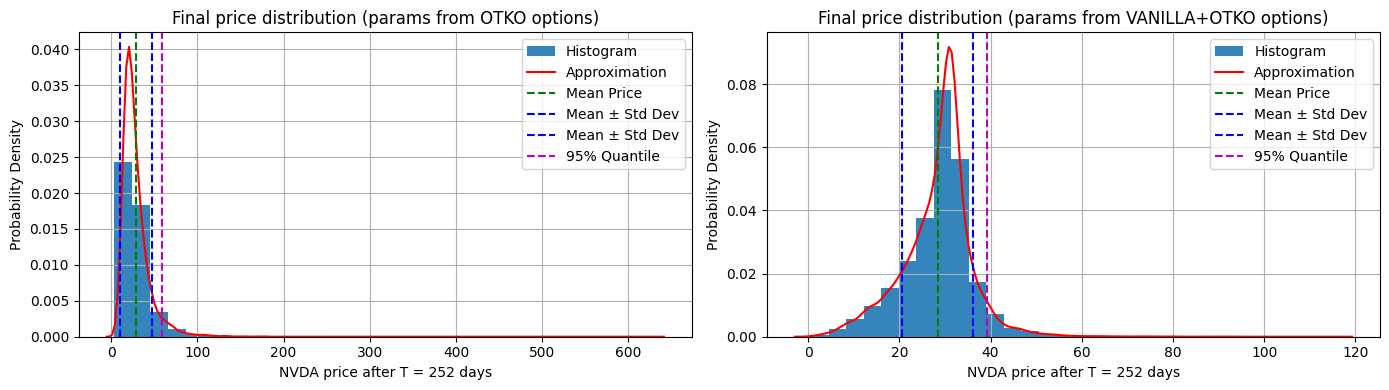

In [109]:
# PLOT FINAL PRICE DISTRIBUTIONS
fig3, axes = plt.subplots(nrows=1, ncols=2, figsize=(14,4))
for i in range(2): 
    model_ = f'VG{i+1}'
    paths_ = f'Svg{i+1}'
    model = locals()[model_]
    paths = locals()[paths_]
    model.plotVGAtFixedTime(paths, days-1, 'NVDA', ax=axes[i])
    axes[i].set_title(f'Final price distribution (params from {options[i]} options)')

fig2, axes = plt.subplots(nrows=1, ncols=2, figsize=(14,4))
for i in range(2): 
    model_ = f'VG{i+3}'
    paths_ = f'Svg{i+3}'
    model = locals()[model_]
    paths = locals()[paths_]
    model.plotVGAtFixedTime(paths, days-1, 'NVDA', ax=axes[i])
    axes[i].set_title(f'Final price distribution (params from {options[i+2]} options)')

plt.tight_layout()
plt.show()

#### 2.1 Reprice plain vanilla with the 3 set of parameters

In [110]:
call_prices = calls['C_Midpoint']
call_strikes = calls['STRIKE']

calls_vg_repriced_1 = np.zeros(len(call_prices))
calls_vg_repriced_3 = np.zeros(len(call_prices))
calls_vg_repriced_4 = np.zeros(len(call_prices))

for index in range(len(call_strikes)):
    calls_vg_repriced_1[index] = VG1.closed_formula_call(call_strikes[index])  # SOLO CALLS PARAMETERS
    calls_vg_repriced_3[index] = VG3.closed_formula_call(call_strikes[index])  # SOLO OTKO PARAMETERS
    calls_vg_repriced_4[index] = VG4.closed_formula_call(call_strikes[index])  # MIXED CALLS+OTKO PARAMETERS

Repricing **CALLS**. The set of parameters used in our Variance Gamma Process will be:
1. Parameters calibrated on CALL options only
2. Parameters calibrated on OTKO options only
3. Parameters calibrated on MIXED calibration, with CALLS and OTKO


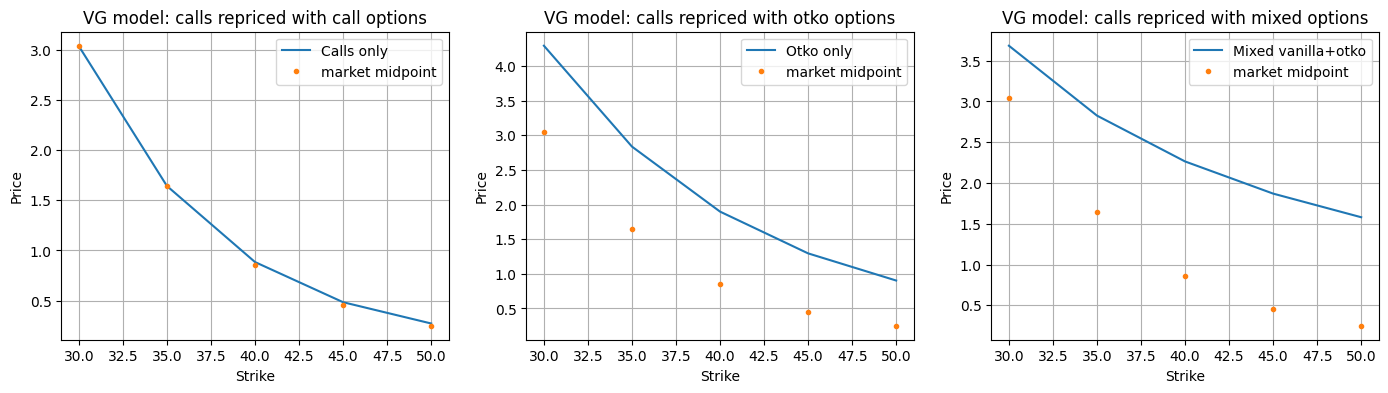

In [111]:
options = ['call', 'otko', 'mixed']
fig = plt.figure(figsize=(17, 4))
ax1 = fig.add_subplot(131)
ax2 = fig.add_subplot(132)
ax3 = fig.add_subplot(133)
ax1.plot(call_strikes, calls_vg_repriced_1, label="Calls only")
ax2.plot(call_strikes, calls_vg_repriced_3, label="Otko only")
ax3.plot(call_strikes, calls_vg_repriced_4, label="Mixed vanilla+otko")
for i in range(3):
    ax_ = f'ax{i+1}'
    ax = locals()[ax_]
    ax.plot(call_strikes, call_prices, ".", label="market midpoint")
    ax.set_title(f"VG model: calls repriced with {options[i]} options")
    ax.set_xlabel("Strike")
    ax.set_ylabel('Price')
    ax.legend()
    ax.grid()
plt.show()

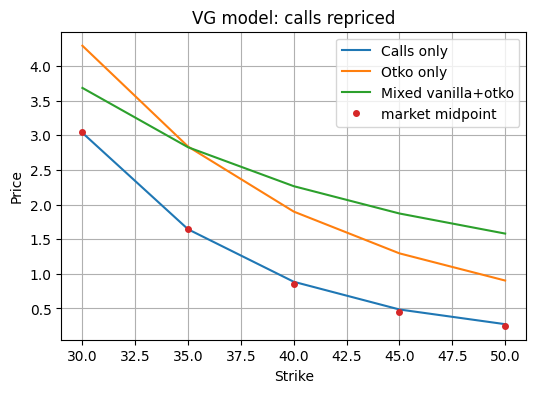

In [112]:
fig = plt.figure(figsize=(6, 4))
plt.plot(call_strikes, calls_vg_repriced_1, label="Calls only")
plt.plot(call_strikes, calls_vg_repriced_3, label="Otko only")
plt.plot(call_strikes, calls_vg_repriced_4, label="Mixed vanilla+otko")
plt.plot(call_strikes, call_prices, ".", label="market midpoint", markersize=8)
plt.title("VG model: calls repriced")
plt.xlabel("Strike")
plt.ylabel('Price')
plt.legend()
plt.grid()
plt.show()

In [113]:
put_prices = puts['P_Midpoint']
put_strikes = puts['STRIKE']

puts_vg_repriced_2 = np.zeros(len(put_prices))
puts_vg_repriced_3 = np.zeros(len(put_prices))
puts_vg_repriced_4 = np.zeros(len(put_prices))

for index in range(len(put_strikes)):
    puts_vg_repriced_2[index] = VG2.closed_formula_put(put_strikes[index])  # SOLO CALLS PARAMETERS
    puts_vg_repriced_3[index] = VG3.closed_formula_put(put_strikes[index])  # SOLO OTKO PARAMETERS
    puts_vg_repriced_4[index] = VG4.closed_formula_put(put_strikes[index])  # MIXED VANILLA+OTKO PARAMETERS

Repricing **PUTS**. The set of parameters used in our Merton Jump Diffusion will be:
1. Parameters calibrated on **put** options only
2. Parameters calibrated on **otko** options only
3. Parameters calibrated on **mixed** calibration, with **calls, put** and **otko**.

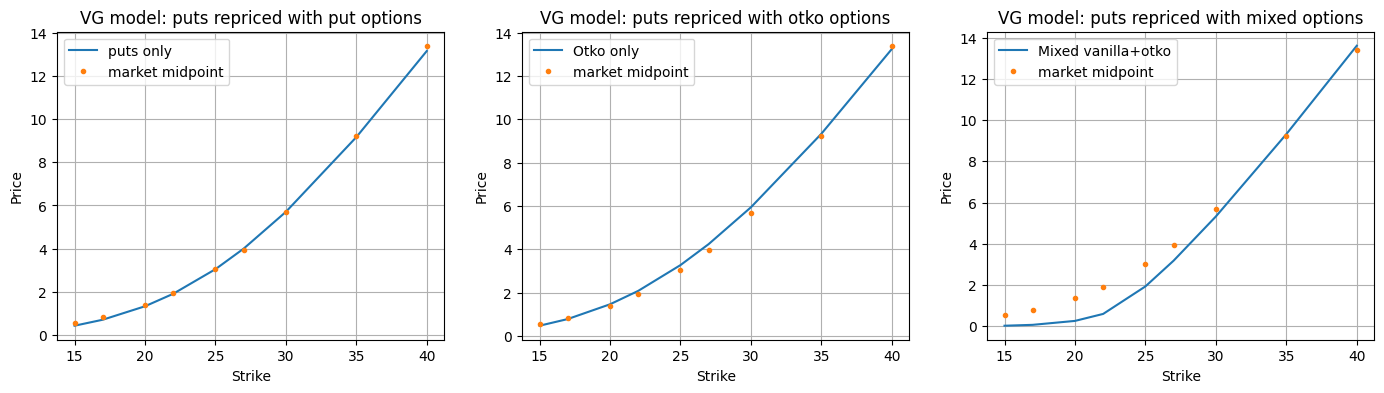

In [114]:
options = ['put', 'otko', 'mixed']

fig = plt.figure(figsize=(17, 4))
ax1 = fig.add_subplot(131)
ax2 = fig.add_subplot(132)
ax3 = fig.add_subplot(133)
ax1.plot(put_strikes, puts_vg_repriced_2, label="puts only")
ax2.plot(put_strikes, puts_vg_repriced_3, label="Otko only")
ax3.plot(put_strikes, puts_vg_repriced_4, label="Mixed vanilla+otko")
for i in range(3):
    ax_ = f'ax{i+1}'
    ax = locals()[ax_]
    ax.plot(put_strikes, put_prices, ".", label="market midpoint")
    ax.set_title(f"VG model: puts repriced with {options[i]} options")
    ax.set_xlabel("Strike")
    ax.set_ylabel('Price')
    ax.legend()
    ax.grid()
plt.show()

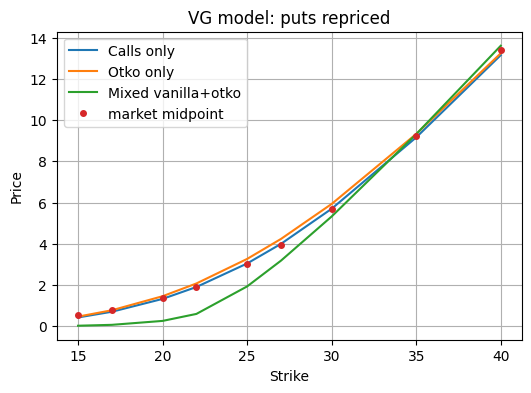

In [115]:
fig = plt.figure(figsize=(6,4))
plt.plot(put_strikes, puts_vg_repriced_2, label="Calls only")
plt.plot(put_strikes, puts_vg_repriced_3, label="Otko only")
plt.plot(put_strikes, puts_vg_repriced_4, label="Mixed vanilla+otko")
plt.plot(put_strikes, put_prices, ".", label="market midpoint", markersize=8)
plt.title("VG model: puts repriced")
plt.xlabel("Strike")
plt.ylabel('Price')
plt.legend()
plt.grid()
plt.show()

#### 2.2. Reprice OTKO options with all the set of parameters

In [116]:
otko_strikes = otko[['K1', 'K2']].values / 100
otko_prices = otko['Midpoint(%)']

otko_vg_repriced_1 = np.zeros(len(otko_prices))
otko_vg_repriced_2 = np.zeros(len(otko_prices))
otko_vg_repriced_3 = np.zeros(len(otko_prices))
otko_vg_repriced_4 = np.zeros(len(otko_prices))

for index in range(len(otko_strikes)):
    otko_vg_repriced_1[index] = VG1.closed_formula_otko6(otko_strikes[index][0], otko_strikes[index][1])      # SOLO CALLS PARAMETERS
    otko_vg_repriced_2[index] = VG2.closed_formula_otko6(otko_strikes[index][0], otko_strikes[index][1])      # SOLO PUTS PARAMETERS
    otko_vg_repriced_3[index] = VG3.closed_formula_otko6(otko_strikes[index][0], otko_strikes[index][1])      # SOLO OTKO PARAMETERS
    otko_vg_repriced_4[index] = VG4.closed_formula_otko6(otko_strikes[index][0], otko_strikes[index][1])      # MIXED VANILLA+OTKO PARAMETERS

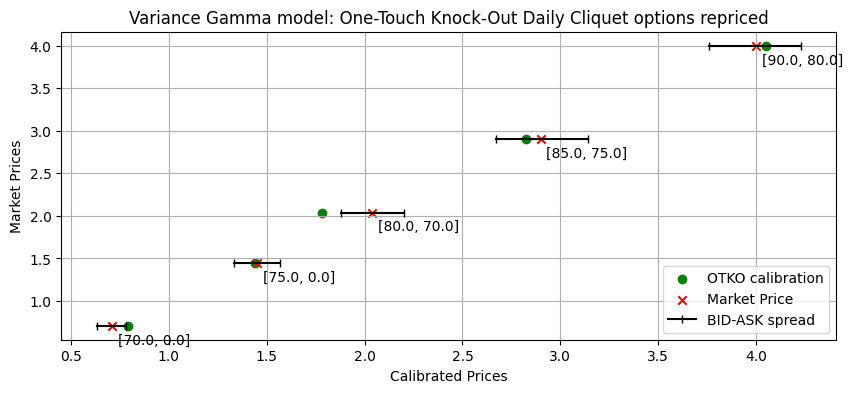

In [117]:
fig, ax = plt.subplots(figsize=(10, 4))
plt.scatter(otko_vg_repriced_3, otko_prices, label='OTKO calibration', color='green', marker='o')

# Aggiunta di una linea di riferimento
plt.scatter(otko_prices, otko_prices, color='red', marker='x', label='Market Price')

# Aggiunta di etichette per i punti
for i in range(len(otko_strikes)):
    offset_x = 4
    offset_y = -13
    plt.annotate(f"[{otko_strikes[i][0]*100}, {otko_strikes[i][1]*100}]", (otko_prices[i], otko_prices[i]),
                 textcoords="offset points",
                 xytext=(offset_x, offset_y))

# Plot segments between bid, ask, and calibrated prices
for i in range(len(otko_strikes)):
    plt.plot([otko['BID(%)'][i], otko['ASK(%)'][i]], [otko_prices[i], otko_prices[i]], color='black', linestyle='-', marker='|')


# Aggiunta di etichette e titoli
plt.xlabel('Calibrated Prices')
plt.ylabel('Market Prices')
plt.title('Variance Gamma model: One-Touch Knock-Out Daily Cliquet options repriced')
handles, labels = ax.get_legend_handles_labels()
line = Line2D([0], [0], label='BID-ASK spread', color='k', linestyle = '-', drawstyle='steps-post', marker='|')
handles.append(line) 
ax.legend(handles = handles, loc='lower right')
plt.grid()
# Mostra il grafico
plt.show()

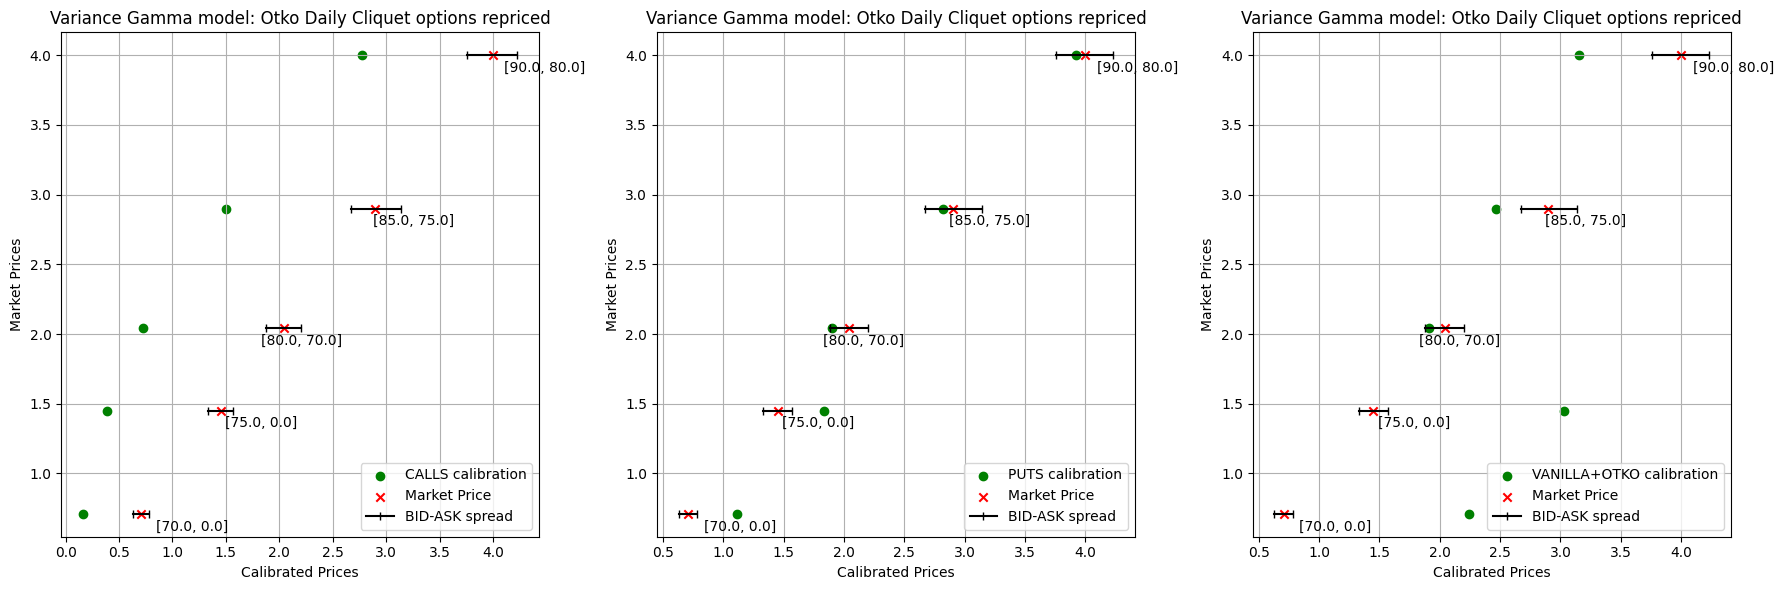

In [118]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18,6))
axes[0].scatter(otko_vg_repriced_1, otko_prices, label='CALLS calibration', color='green', marker='o')
axes[1].scatter(otko_vg_repriced_2, otko_prices, label='PUTS calibration', color='green', marker='o')
axes[2].scatter(otko_vg_repriced_4, otko_prices, label='VANILLA+OTKO calibration', color='green', marker='o')

# Aggiunta di etichette per i punti
for i in range(3):
    ax = axes[i]  # Get the current axis
    for k in range(len(otko_strikes)):
        offset_x = 4
        offset_y = -12
        ax.annotate(f"[{otko_strikes[k][0]*100}, {otko_strikes[k][1]*100}]", (otko_vg_repriced_3[k], otko_prices[k]),
                    textcoords="offset points",
                    xytext=(offset_x, offset_y))

    # Aggiunta di etichette e titoli per ogni subplot
    ax.set_xlabel('Calibrated Prices')
    ax.set_ylabel('Market Prices')
    ax.set_title('Variance Gamma model: Otko Daily Cliquet options repriced')
    ax.legend()

    # Plot reference lines and segments between bid, ask, and calibrated prices
    ax.scatter(otko_prices, otko_prices, color='red', marker='x', label='Market Price')
    for k in range(len(otko_strikes)):
        ax.plot([otko['BID(%)'][k], otko['ASK(%)'][k]], [otko_prices[k], otko_prices[k]], color='black', linestyle='-', marker='|')
    ax.grid(True)
    handles, labels = ax.get_legend_handles_labels()
    line = Line2D([0], [0], label='BID-ASK spread', color='k', linestyle = '-', drawstyle='steps-post', marker='|')
    handles.append(line) 
    ax.legend(handles = handles, loc='lower right')

# Adjust layout
plt.tight_layout()


# Mostra il grafico
plt.show()

### 3. Show the goodness of fit: adaptation error

In [119]:
def mean_outside_error(model_prices, mkt_bid, mkt_ask):

    outside_errors = [(model_prices[i] - mkt_ask[i]) / mkt_ask[i] if model_prices[i] > mkt_ask[i]
                      else (mkt_bid[i] - model_prices[i]) / mkt_bid[i] if model_prices[i] < mkt_bid[i]
                      else 0 for i in range(len(model_prices))]

    mean_outside_error = np.mean(outside_errors)

    return mean_outside_error

Let's compute the mean outside error for each type of option, using the set of parameters calibrated on the correspondant set of options. Meaning that, for each model (MJD, KJD and VG) the error of the **CALL PRICES** will be the relative distance between the CALL *model price* and the CALL *market price*.

In [120]:
errors_mert_prices = np.zeros(3)
# Call the function to compute the mean outside error
errors_mert_prices[0] = round(mean_outside_error(calls_mert_repriced_1, calls['C_BID'], calls['C_ASK']),3)    # parameters from CALLS calibration
errors_mert_prices[1] = round(mean_outside_error(puts_mert_repriced_2, puts['P_BID'], puts['P_ASK']),3)       # parameters from PUTS calibration
errors_mert_prices[2] = round(mean_outside_error(otko_mert_repriced_3, otko['BID(%)'], otko['ASK(%)']),3)     # parameters from OTKO calibration
print("Mean Outside Error for MERTON model:", errors_mert_prices)

errors_kou_prices = np.zeros(3)
# Call the function to compute the mean outside error
errors_kou_prices[0] = round(mean_outside_error(calls_kou_repriced_1, calls['C_BID'], calls['C_ASK']),3)         # parameters from CALLS calibration
errors_kou_prices[1] = round(mean_outside_error(puts_kou_repriced_2, puts['P_BID'], puts['P_ASK']),3)              # parameters from PUTS calibration
errors_kou_prices[2] = round(mean_outside_error(otko_kou_repriced_3, otko['BID(%)'], otko['ASK(%)']),3)            # parameters from OTKO calibration
print("Mean Outside Error for KOU model:", errors_kou_prices)

errors_vg_prices = np.zeros(3)
# Call the function to compute the mean outside error
errors_vg_prices[0] = round(mean_outside_error(calls_vg_repriced_1, calls['C_BID'], calls['C_ASK']),3)         # parameters from CALLS calibration
errors_vg_prices[1] = round(mean_outside_error(puts_vg_repriced_2, puts['P_BID'], puts['P_ASK']),3)              # parameters from PUTS calibration
errors_vg_prices[2] = round(mean_outside_error(otko_vg_repriced_3, otko['BID(%)'], otko['ASK(%)']),3)            # parameters from OTKO calibration
print("Mean Outside Error for VG model:", errors_vg_prices)

Mean Outside Error for MERTON model: [0.    0.041 0.   ]
Mean Outside Error for KOU model: [0.008 0.096 0.296]
Mean Outside Error for VG model: [0.    0.03  0.013]


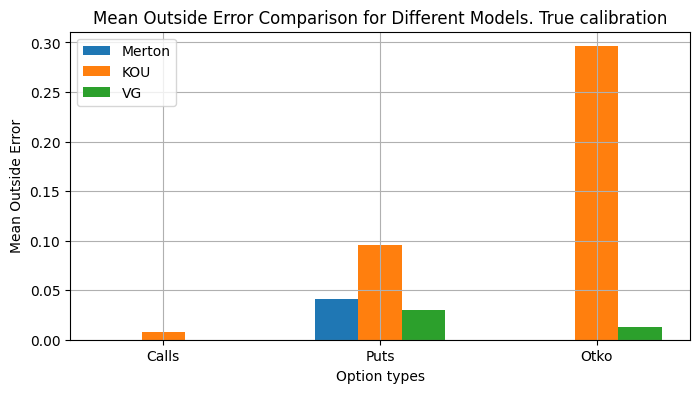

In [121]:
models = ['Merton', 'Kou', 'Variance Gamma']
options = ['Calls', 'Puts', 'Otko']
# Create a figure and axis
fig, ax = plt.subplots(figsize=(8, 4))

bar_width = 0.2
index = np.arange(len(models))

# Plot the grouped bars for each model
ax.bar(index - bar_width, errors_mert_prices, bar_width, label='Merton')
ax.bar(index, errors_kou_prices, bar_width, label='KOU')
ax.bar(index + bar_width, errors_vg_prices, bar_width, label='VG')

# Add labels and title
ax.set_xlabel('Option types')
ax.set_ylabel('Mean Outside Error')
ax.set_title('Mean Outside Error Comparison for Different Models. True calibration')
ax.set_xticks(index)
ax.set_xticklabels(options)
ax.legend()
plt.grid(True)

# Show the plot
plt.show()

Let's compute the mean outside error for each type of option, using the set of parameters calibrated on the MIXEd set of options, i.e. vanilla + otko together. Meaning that, for each model (MJD, KJD and VG) the error of the **CALL PRICES** will be the relative distance between the CALL *model price* and the CALL+OTKO *market prices*.

In [122]:
errors_mert_prices2 = np.zeros(3)

# Call the function to compute the mean outside error
errors_mert_prices2[0] = mean_outside_error(calls_mert_repriced_4, calls['C_BID'], calls['C_ASK'])   # parameters from VANILLA+OTKO calibration
errors_mert_prices2[1] = mean_outside_error(puts_mert_repriced_4, puts['P_BID'], puts['P_ASK'])      # parameters from VANILLA+OTKO calibration
errors_mert_prices2[2] = mean_outside_error(otko_mert_repriced_4, otko['BID(%)'], otko['ASK(%)'])    # parameters from VANILLA+OTKO calibration

print("Mean Outside Error for Merton model:", errors_mert_prices2)

errors_kou_prices2 = np.zeros(3)
# Call the function to compute the mean outside error
errors_kou_prices2[0] = mean_outside_error(calls_kou_repriced_4, calls['C_BID'], calls['C_ASK'])           # parameters from VANILLA+OTKO calibration
errors_kou_prices2[1] = mean_outside_error(puts_kou_repriced_4, puts['P_BID'], puts['P_ASK'])              # parameters from VANILLA+OTKO calibration
errors_kou_prices2[2] = mean_outside_error(otko_kou_repriced_4, otko['BID(%)'], otko['ASK(%)'])            # parameters from VANILLA+OTKO calibration

print("Mean Outside Error for KOU model:", errors_kou_prices2)

errors_vg_prices2 = np.zeros(3)
# Call the function to compute the mean outside error
errors_vg_prices2[0] = mean_outside_error(calls_vg_repriced_4, calls['C_BID'], calls['C_ASK'])           # parameters from VANILLA+OTKO calibration
errors_vg_prices2[1] = mean_outside_error(puts_vg_repriced_4, puts['P_BID'], puts['P_ASK'])              # parameters from VANILLA+OTKO calibration
errors_vg_prices2[2] = mean_outside_error(otko_vg_repriced_4, otko['BID(%)'], otko['ASK(%)'])            # parameters from VANILLA+OTKO calibration
print("Mean Outside Error for VG model:", errors_vg_prices2)

Mean Outside Error for Merton model: [0.28303097 0.19703102 0.        ]
Mean Outside Error for KOU model: [0.60045998 0.12897395 0.15945324]
Mean Outside Error for VG model: [1.9750799  0.43815769 0.60926316]


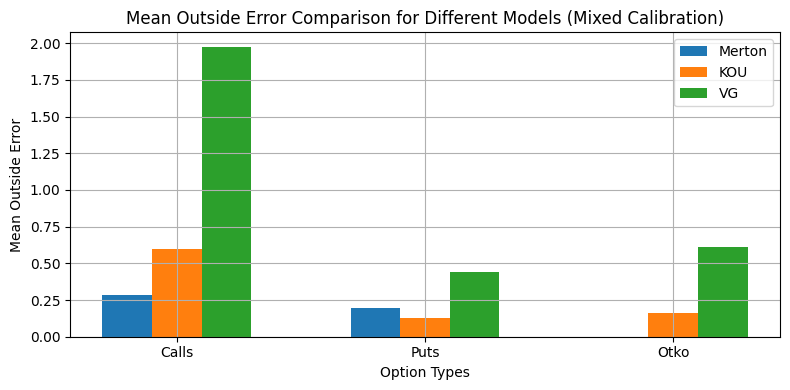

In [123]:
models = ['Merton', 'Kou', 'Variance Gamma']
options = ['Calls', 'Puts', 'Otko']
# Create a figure and axis
fig, ax = plt.subplots(figsize=(8,4))

bar_width = 0.2
index = np.arange(len(options))

# Plot the grouped bars for each model
ax.bar(index - bar_width, errors_mert_prices2, bar_width, label='Merton')
ax.bar(index, errors_kou_prices2, bar_width, label='KOU')
ax.bar(index + bar_width, errors_vg_prices2, bar_width, label='VG')

# Add labels and title
ax.set_xlabel('Option Types')
ax.set_ylabel('Mean Outside Error')
ax.set_title('Mean Outside Error Comparison for Different Models (Mixed Calibration)')
ax.set_xticks(index)
ax.set_xticklabels(options)
ax.legend()
plt.grid(True)

# Show the plot
plt.tight_layout()  # Ensure labels and ticks fit properly
plt.show()

### 4. Comparison with historical data
#### 4.1 Returns observed in real data vs simulated data

In [124]:
# plot of historical log returns 
data['Cumulative Log Returns'] = np.cumsum(data['Log Returns'], axis =0)
data_one_year = data.iloc[1:days, :]
print(data_one_year.head(3))
data_one_year['Log Returns'].describe()

         Date       Open       High        Low      Close    Volume   Returns  \
1  2016-01-21  27.124755  27.564139  26.568198  27.144281  48145600  1.011645   
2  2016-01-22  27.661779  27.964467  27.603195  27.778950  25799600  1.023381   
3  2016-01-25  27.769187  28.091404  27.691074  27.749659  27072800  0.998946   

   Log Returns  Returns (%)  Cumulative Log Returns  
1     0.011577     1.164469                0.011577  
2     0.023112     2.338129                0.034690  
3    -0.001055    -0.105444                0.033635  


count    251.000000
mean       0.005300
std        0.027721
min       -0.071266
25%       -0.006473
50%        0.002777
75%        0.016079
max        0.260876
Name: Log Returns, dtype: float64

Text(0, 0.5, 'Sample quantiles')

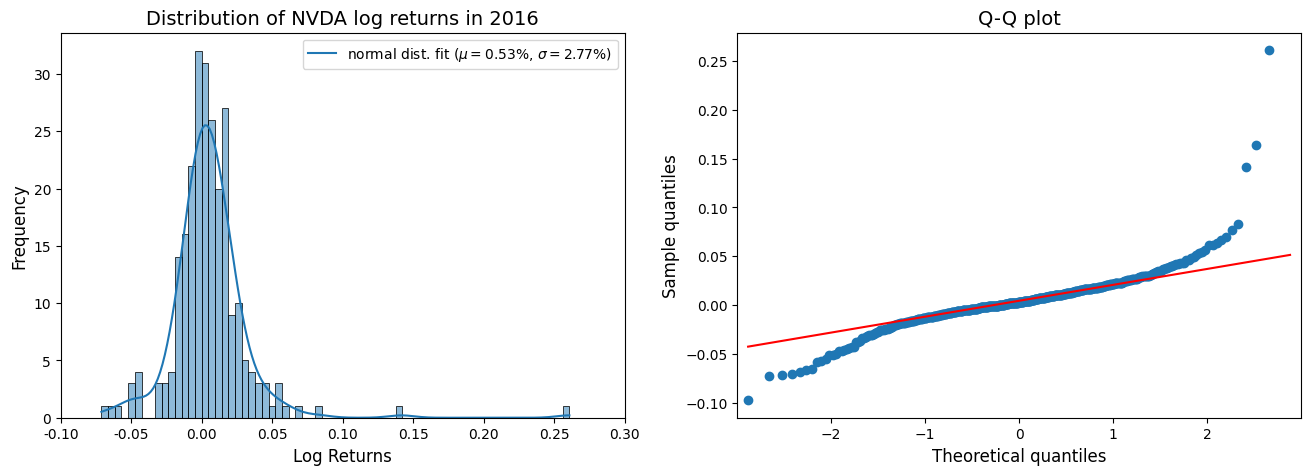

In [125]:
logreturns = data_one_year['Log Returns'].values
fig, ax = plt.subplots(1,2, figsize=(16,5))
sns.histplot(logreturns, ax=ax[0], bins=70, kde=True)
(mu, s) = stats.norm.fit(data_one_year['Log Returns'].values)
# Plot the normal distribution curve
x = np.linspace(min(logreturns), max(logreturns), 100)
y = stats.norm.pdf(x, mu, s)
#ax[0].plot(x, y, color='red', linestyle='-', linewidth=2)
ax[0].set_title('Distribution of NVDA log returns in 2016', fontsize=14)
ax[0].set_xlabel('Log Returns', fontsize=12)
ax[0].set_ylabel('Frequency', fontsize=12)
ax[0].set_xticks(ax[0].get_xticks())
ax[0].set_xticklabels(['{:,.2f}'.format(x) for x in ax[0].get_xticks()])
ax[0].legend(["normal dist. fit ($\mu=${0:,.2%}, $\sigma=${1:,.2%})".format(mu, s)], fontsize=10)

# Subplot 2
# Obtaining Q-Q plot using qqplot function of statsmodels.api library
qq = sm.qqplot(data['Log Returns'].values, line='q', ax=ax[1])
#setting title and fontsize of the second plot
ax[1].set_title('Q-Q plot', fontsize = 14)
ax[1].set_xlabel('Theoretical quantiles', fontsize=12)
ax[1].set_ylabel('Sample quantiles', fontsize=12)

##### The distribution of the cumulative log returns for paths generated with params calibrated on CALLS options 

In [126]:
log_returns_mert1 = np.log(Smert1[1:, :] / Smert1[:-1, :])
lr_mert1_flattened = log_returns_mert1.flatten()
log_returns_kou1 = np.log(Skou1[1:, :] / Skou1[:-1, :])
lr_kou1_flattened = log_returns_kou1.flatten()
log_returns_vg1 = np.log(Svg1[1:, :] / Svg1[:-1, :])
lr_vg1_flattened = log_returns_vg1.flatten()

cum_log_returns_mert1 = np.cumsum(log_returns_mert1, axis=0)[-1, :]
cum_log_returns_kou1 = np.cumsum(log_returns_kou1, axis=0)[-1, :]
cum_log_returns_vg1 = np.cumsum(log_returns_vg1, axis=0)[-1, :]


Cumulative Log Returns. Model parameters calibrated on CALLS OPTIONS


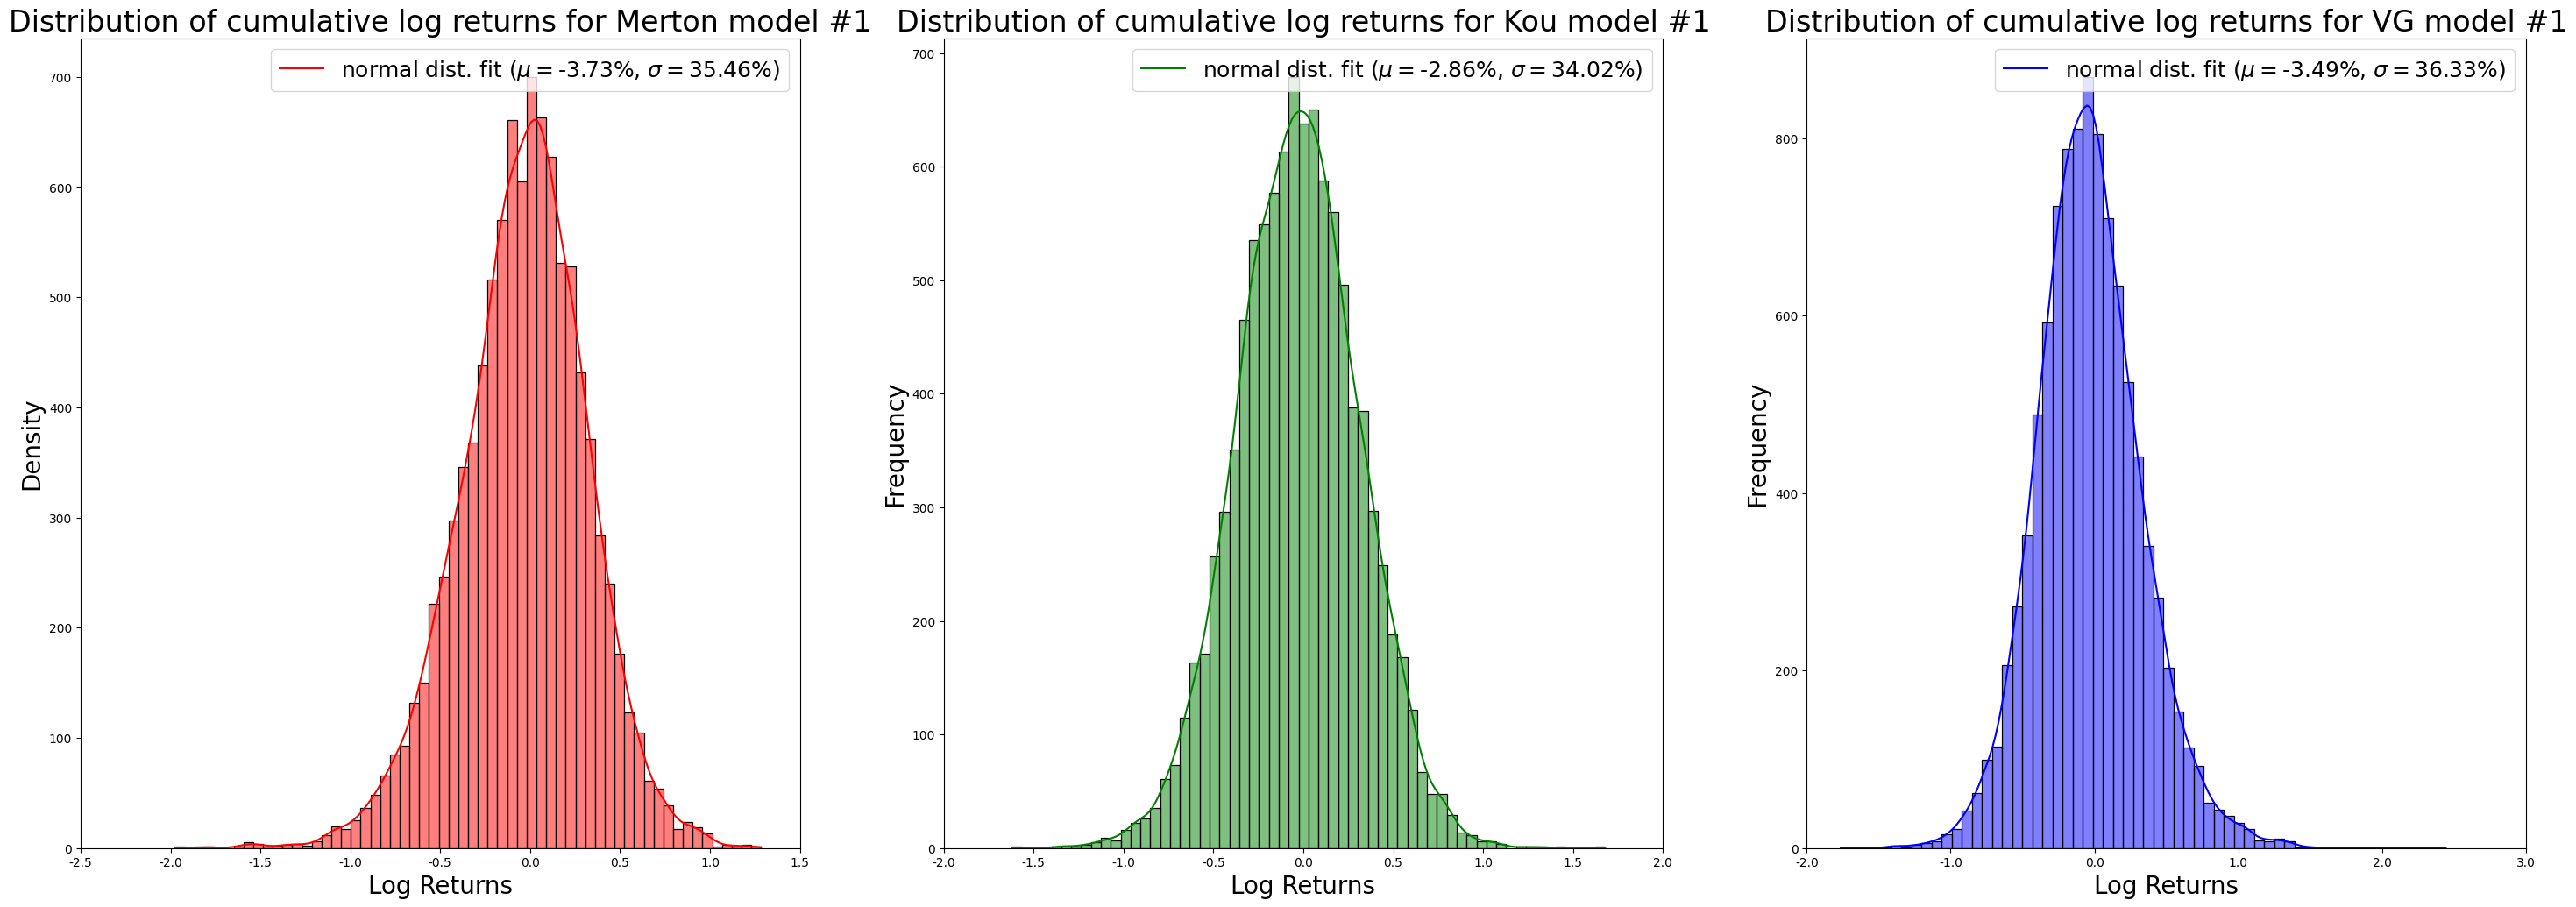

In [127]:
fig, ax = plt.subplots(ncols=3, figsize=(36,12))

# fit a dist plot
sns.histplot(cum_log_returns_mert1, ax=ax[0], bins=60, kde=True, color= 'red')
sns.histplot(cum_log_returns_kou1, ax=ax[1], bins=60, kde=True, color= 'green')
sns.histplot(cum_log_returns_vg1, ax=ax[2], bins=60, kde=True, color= 'blue')
print("Cumulative Log Returns. Model parameters calibrated on CALLS OPTIONS")
# compute the params of the fitted normal curve
(mu, s) = stats.norm.fit(cum_log_returns_mert1) #, color='red', linewidth = 20)
ax[0].set_title('Distribution of cumulative log returns for Merton model #1', fontsize=24)
ax[0].set_xlabel('Log Returns', fontsize=20)
ax[0].set_ylabel('Density', fontsize=20)
ax[0].set_xticks(ax[0].get_xticks()) 
ax[0].set_xticklabels(['{:,.1f}'.format(x) for x in ax[0].get_xticks()])
ax[0].legend(["normal dist. fit ($\mu=${0:,.2%}, $\sigma=${1:,.2%})".format(mu, s)], fontsize=18)

# compute the params of the fitted normal curve
(mu, s) = stats.norm.fit(cum_log_returns_kou1)
ax[1].set_title('Distribution of cumulative log returns for Kou model #1', fontsize=24)
ax[1].set_xlabel('Log Returns', fontsize=20)
ax[1].set_ylabel('Frequency', fontsize=20)
ax[1].set_xticks(ax[1].get_xticks())
ax[1].set_xticklabels(['{:,.1f}'.format(x) for x in ax[1].get_xticks()])
ax[1].legend(["normal dist. fit ($\mu=${0:,.2%}, $\sigma=${1:,.2%})".format(mu, s)], fontsize=18)

# compute the params of the fitted normal curve
(mu, s) = stats.norm.fit(cum_log_returns_vg1)
ax[2].set_title('Distribution of cumulative log returns for VG model #1', fontsize=24)
ax[2].set_xlabel('Log Returns', fontsize=20)
ax[2].set_ylabel('Frequency', fontsize=20)
ax[2].set_xticks(ax[2].get_xticks())
ax[2].set_xticklabels(['{:,.1f}'.format(x) for x in ax[2].get_xticks()])
ax[2].legend(["normal dist. fit ($\mu=${0:,.2%}, $\sigma=${1:,.2%})".format(mu, s)], fontsize=18)


##### The distribution of the cumulative log returns for paths generated with params calibrated on PUTS options

In [128]:
log_returns_mert2 = np.log(Smert2[1:, :] / Smert2[:-1, :])
lr_mert2_flattened = log_returns_mert2.flatten()
log_returns_kou2 = np.log(Skou2[1:, :] / Skou2[:-1, :])
lr_kou2_flattened = log_returns_kou2.flatten()
log_returns_vg2 = np.log(Svg2[1:, :] / Svg2[:-1, :])
lr_vg2_flattened = log_returns_vg2.flatten()

cum_log_returns_mert2 = np.cumsum(log_returns_mert2, axis=0)[-1, :]
cum_log_returns_kou2 = np.cumsum(log_returns_kou2, axis=0)[-1, :]
cum_log_returns_vg2 = np.cumsum(log_returns_vg2, axis=0)[-1, :]

Cumulative Log Returns. Model parameters calibrated on PUT OPTIONS


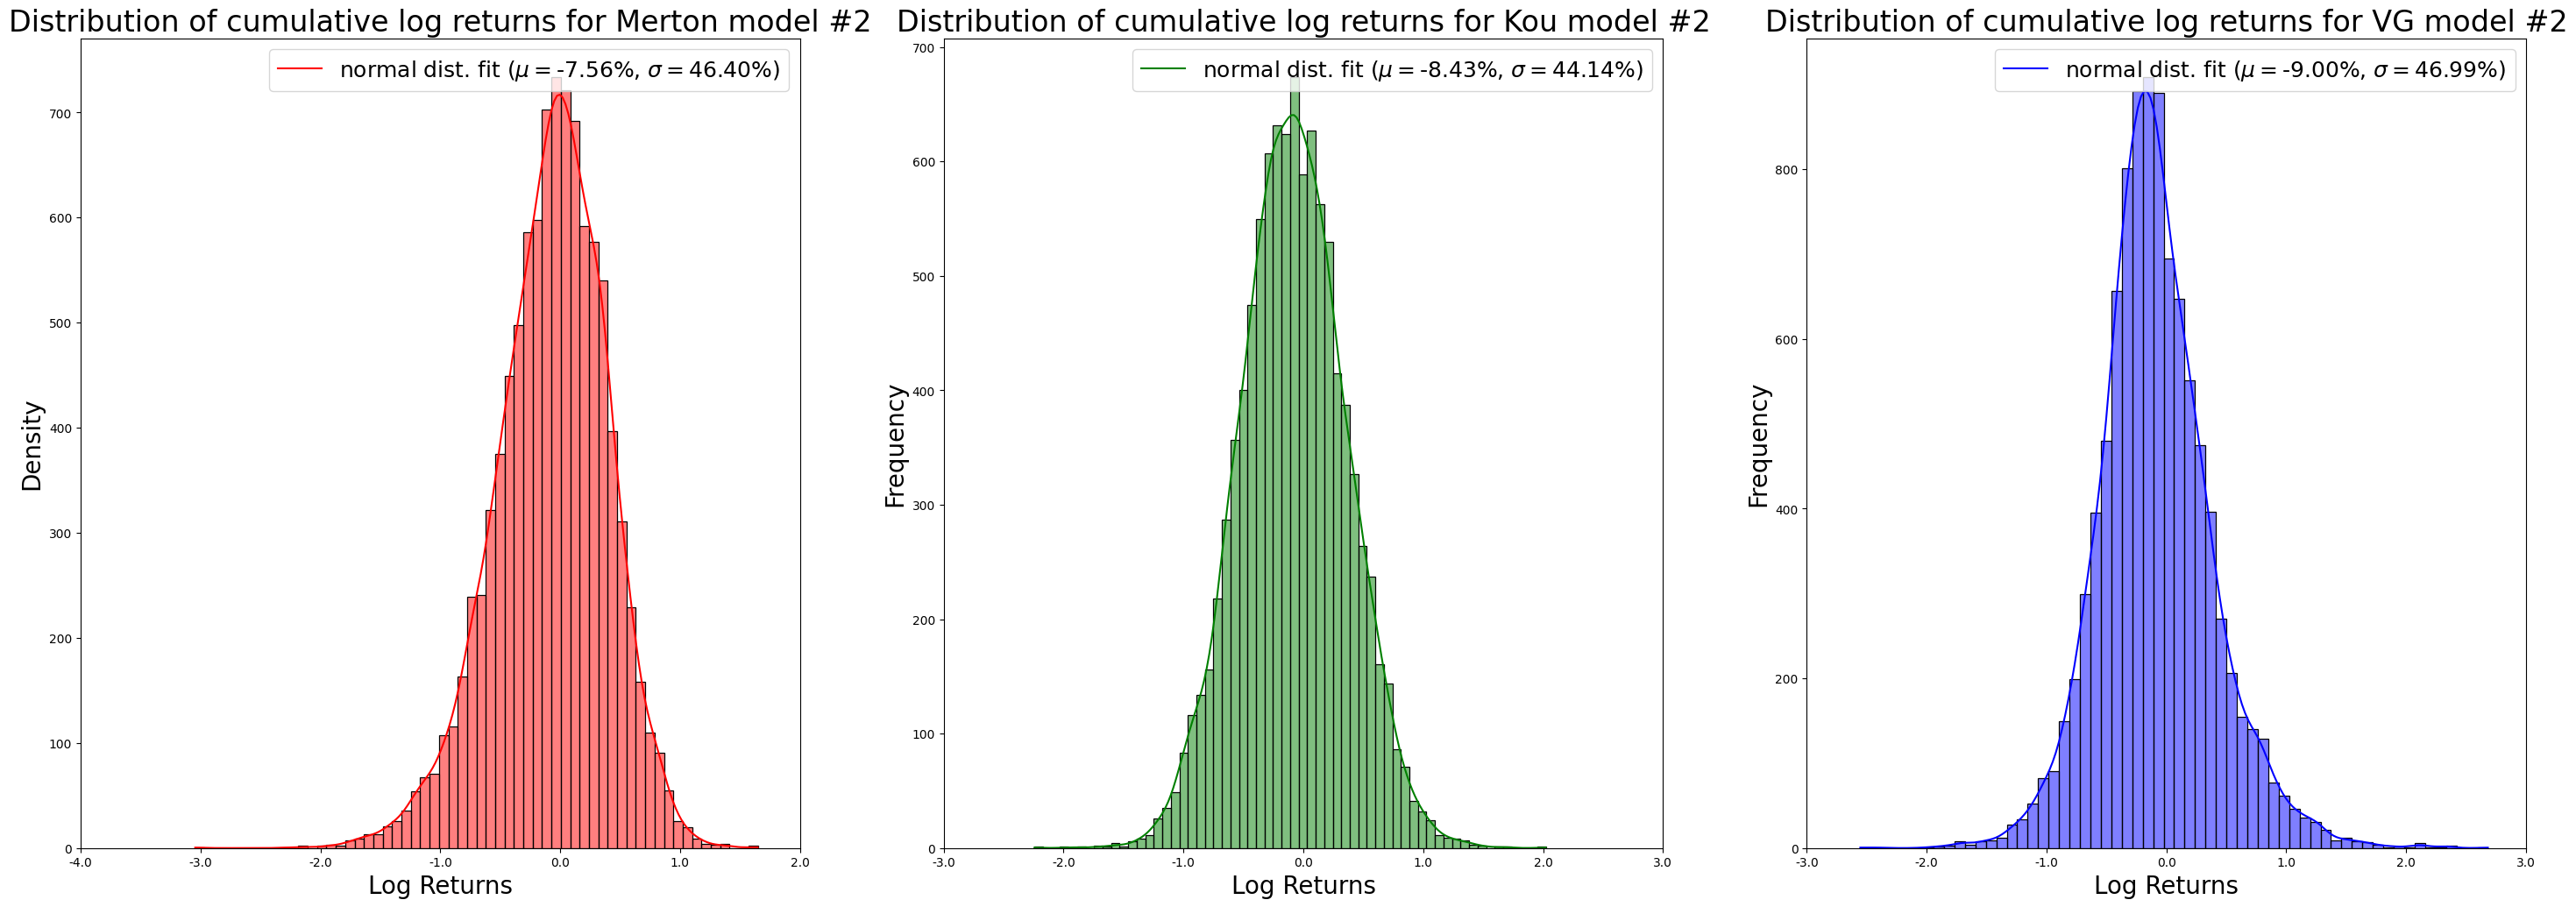

In [129]:
fig, ax = plt.subplots(ncols=3, figsize=(36,12))

# fit a dist plot
sns.histplot(cum_log_returns_mert2, ax=ax[0], bins=60, kde=True, color= 'red')
sns.histplot(cum_log_returns_kou2, ax=ax[1], bins=60, kde=True, color= 'green')
sns.histplot(cum_log_returns_vg2, ax=ax[2], bins=60, kde=True, color= 'blue')

print("Cumulative Log Returns. Model parameters calibrated on PUT OPTIONS")

# compute the params of the fitted normal curve
(mu, s) = stats.norm.fit(cum_log_returns_mert2) #, color='red', linewidth = 20)
ax[0].set_title('Distribution of cumulative log returns for Merton model #2', fontsize=24)
ax[0].set_xlabel('Log Returns', fontsize=20)
ax[0].set_ylabel('Density', fontsize=20)
ax[0].set_xticks(ax[0].get_xticks()) 
ax[0].set_xticklabels(['{:,.1f}'.format(x) for x in ax[0].get_xticks()])
ax[0].legend(["normal dist. fit ($\mu=${0:,.2%}, $\sigma=${1:,.2%})".format(mu, s)], fontsize=18)

# compute the params of the fitted normal curve
(mu, s) = stats.norm.fit(cum_log_returns_kou2)
ax[1].set_title('Distribution of cumulative log returns for Kou model #2', fontsize=24)
ax[1].set_xlabel('Log Returns', fontsize=20)
ax[1].set_ylabel('Frequency', fontsize=20)
ax[1].set_xticks(ax[1].get_xticks())
ax[1].set_xticklabels(['{:,.1f}'.format(x) for x in ax[1].get_xticks()])
ax[1].legend(["normal dist. fit ($\mu=${0:,.2%}, $\sigma=${1:,.2%})".format(mu, s)], fontsize=18)

# compute the params of the fitted normal curve
(mu, s) = stats.norm.fit(cum_log_returns_vg2)
ax[2].set_title('Distribution of cumulative log returns for VG model #2', fontsize=24)
ax[2].set_xlabel('Log Returns', fontsize=20)
ax[2].set_ylabel('Frequency', fontsize=20)
ax[2].set_xticks(ax[2].get_xticks())
ax[2].set_xticklabels(['{:,.1f}'.format(x) for x in ax[2].get_xticks()])
ax[2].legend(["normal dist. fit ($\mu=${0:,.2%}, $\sigma=${1:,.2%})".format(mu, s)], fontsize=18)

##### The distribution of the cumulative log returns for paths generated with params calibrated on OTKO options

Cumulative Log Returns. Model parameters calibrated on OTKO OPTIONS


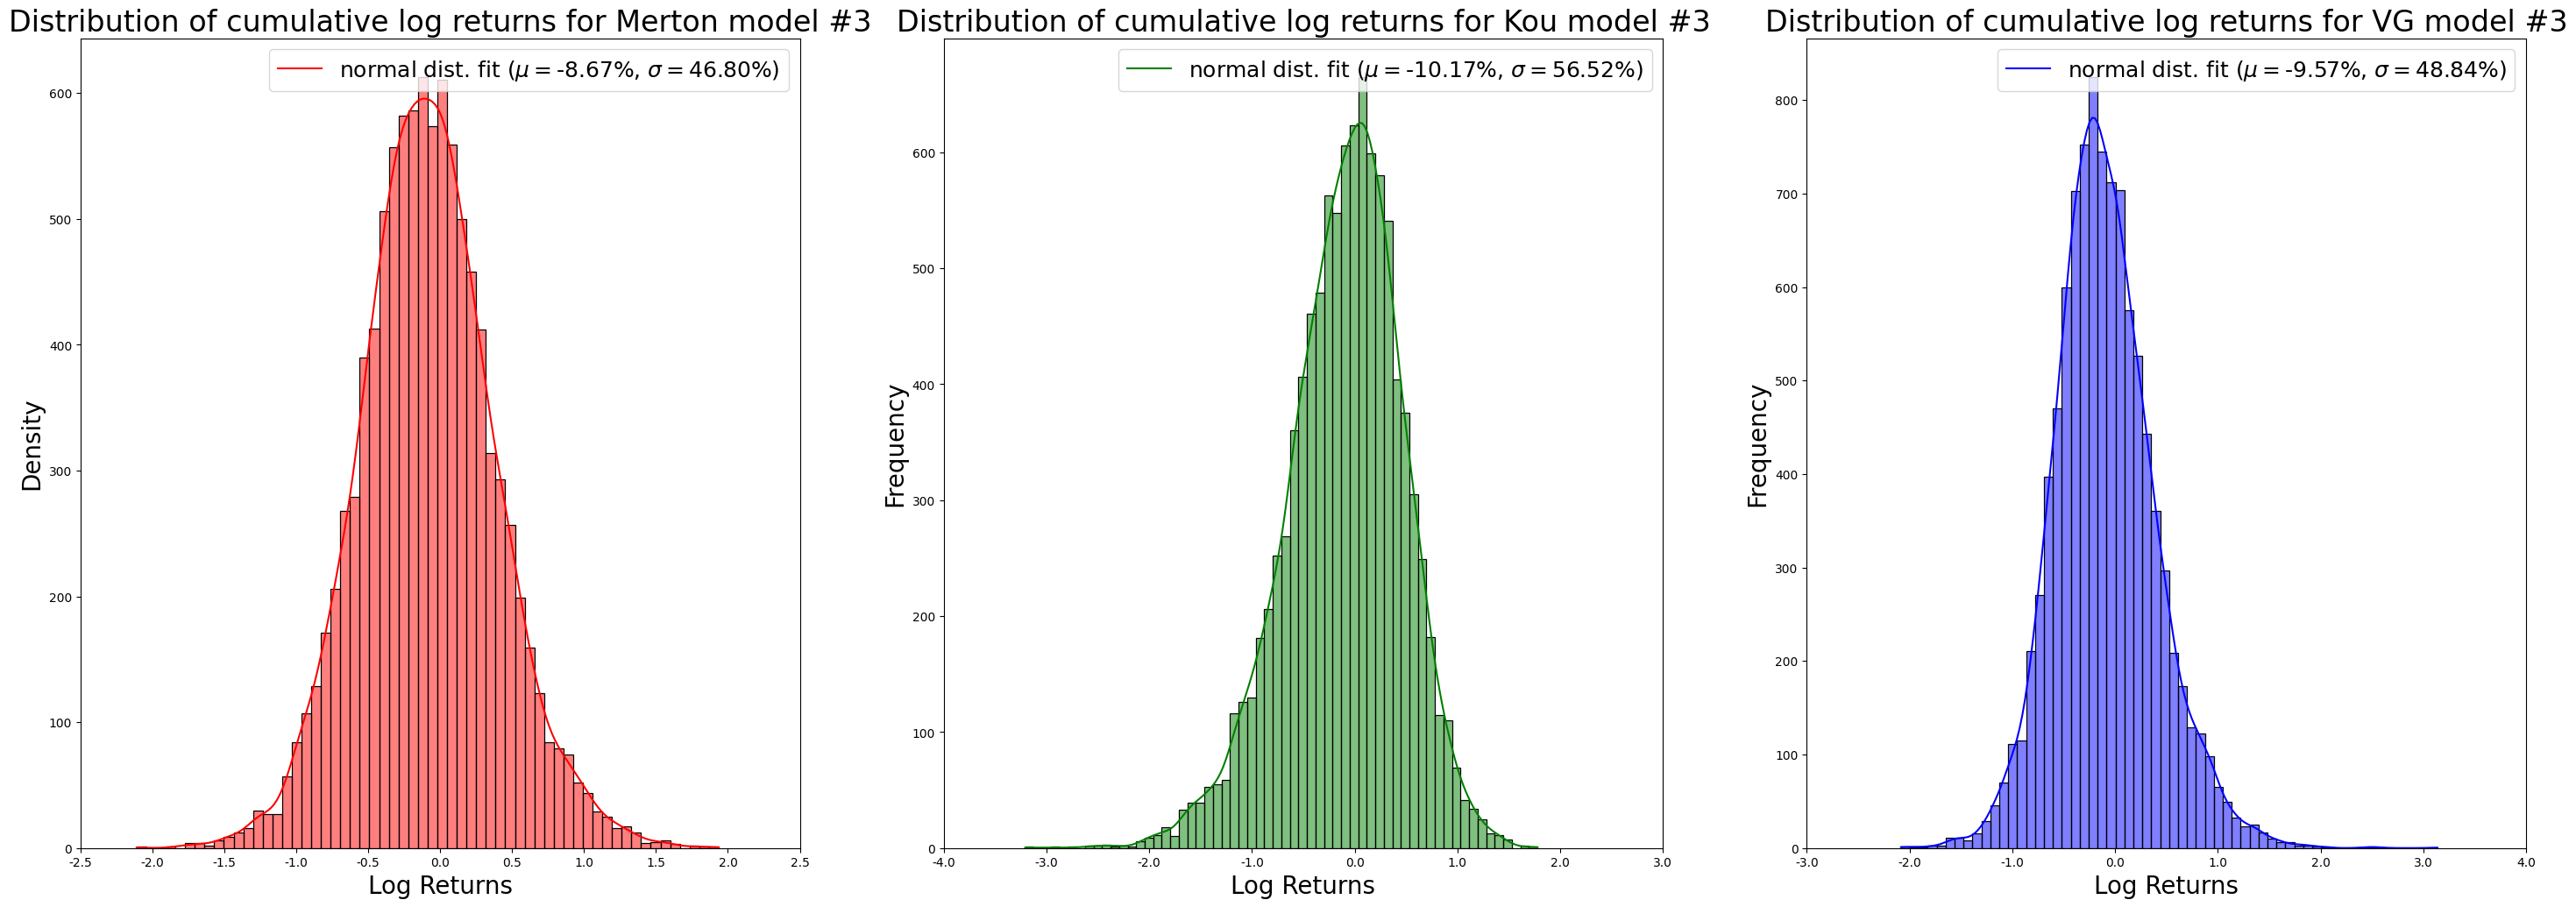

In [130]:
log_returns_mert3 = np.log(Smert3[1:, :] / Smert3[:-1, :])
lr_mert3_flattened = log_returns_mert3.flatten()
log_returns_kou3 = np.log(Skou3[1:, :] / Skou3[:-1, :])
lr_kou3_flattened = log_returns_kou3.flatten()
log_returns_vg3 = np.log(Svg3[1:, :] / Svg3[:-1, :])
lr_vg3_flattened = log_returns_vg3.flatten()

cum_log_returns_mert3 = np.cumsum(log_returns_mert3, axis=0)[-1, :]
cum_log_returns_kou3 = np.cumsum(log_returns_kou3, axis=0)[-1, :]
cum_log_returns_vg3 = np.cumsum(log_returns_vg3, axis=0)[-1, :]
fig, ax = plt.subplots(ncols=3, figsize=(36, 12))

# fit a dist plot
sns.histplot(cum_log_returns_mert3, ax=ax[0], bins=60, kde=True, color='red')
sns.histplot(cum_log_returns_kou3, ax=ax[1], bins=60, kde=True, color='green')
sns.histplot(cum_log_returns_vg3, ax=ax[2], bins=60, kde=True, color='blue')

print("Cumulative Log Returns. Model parameters calibrated on OTKO OPTIONS")

# compute the params of the fitted normal curve
(mu, s) = stats.norm.fit(cum_log_returns_mert3)  #, color='red', linewidth = 20)
ax[0].set_title('Distribution of cumulative log returns for Merton model #3', fontsize=24)
ax[0].set_xlabel('Log Returns', fontsize=20)
ax[0].set_ylabel('Density', fontsize=20)
ax[0].set_xticks(ax[0].get_xticks())
ax[0].set_xticklabels(['{:,.1f}'.format(x) for x in ax[0].get_xticks()])
ax[0].legend(["normal dist. fit ($\mu=${0:,.2%}, $\sigma=${1:,.2%})".format(mu, s)], fontsize=18)

# compute the params of the fitted normal curve
(mu, s) = stats.norm.fit(cum_log_returns_kou3)
ax[1].set_title('Distribution of cumulative log returns for Kou model #3', fontsize=24)
ax[1].set_xlabel('Log Returns', fontsize=20)
ax[1].set_ylabel('Frequency', fontsize=20)
ax[1].set_xticks(ax[1].get_xticks())
ax[1].set_xticklabels(['{:,.1f}'.format(x) for x in ax[1].get_xticks()])
ax[1].legend(["normal dist. fit ($\mu=${0:,.2%}, $\sigma=${1:,.2%})".format(mu, s)], fontsize=18)

# compute the params of the fitted normal curve
(mu, s) = stats.norm.fit(cum_log_returns_vg3)
ax[2].set_title('Distribution of cumulative log returns for VG model #3', fontsize=24)
ax[2].set_xlabel('Log Returns', fontsize=20)
ax[2].set_ylabel('Frequency', fontsize=20)
ax[2].set_xticks(ax[2].get_xticks())
ax[2].set_xticklabels(['{:,.1f}'.format(x) for x in ax[2].get_xticks()])
ax[2].legend(["normal dist. fit ($\mu=${0:,.2%}, $\sigma=${1:,.2%})".format(mu, s)], fontsize=18)

##### The distribution of the cumulative log returns for paths generated with params calibrated on MIXED options (CALLS, PUTS AND OTKO)

Cumulative Log Returns. Model parameters calibrated on the MIXED SET of OPTIONS: EUROPEAN VANILLA AND OTKO


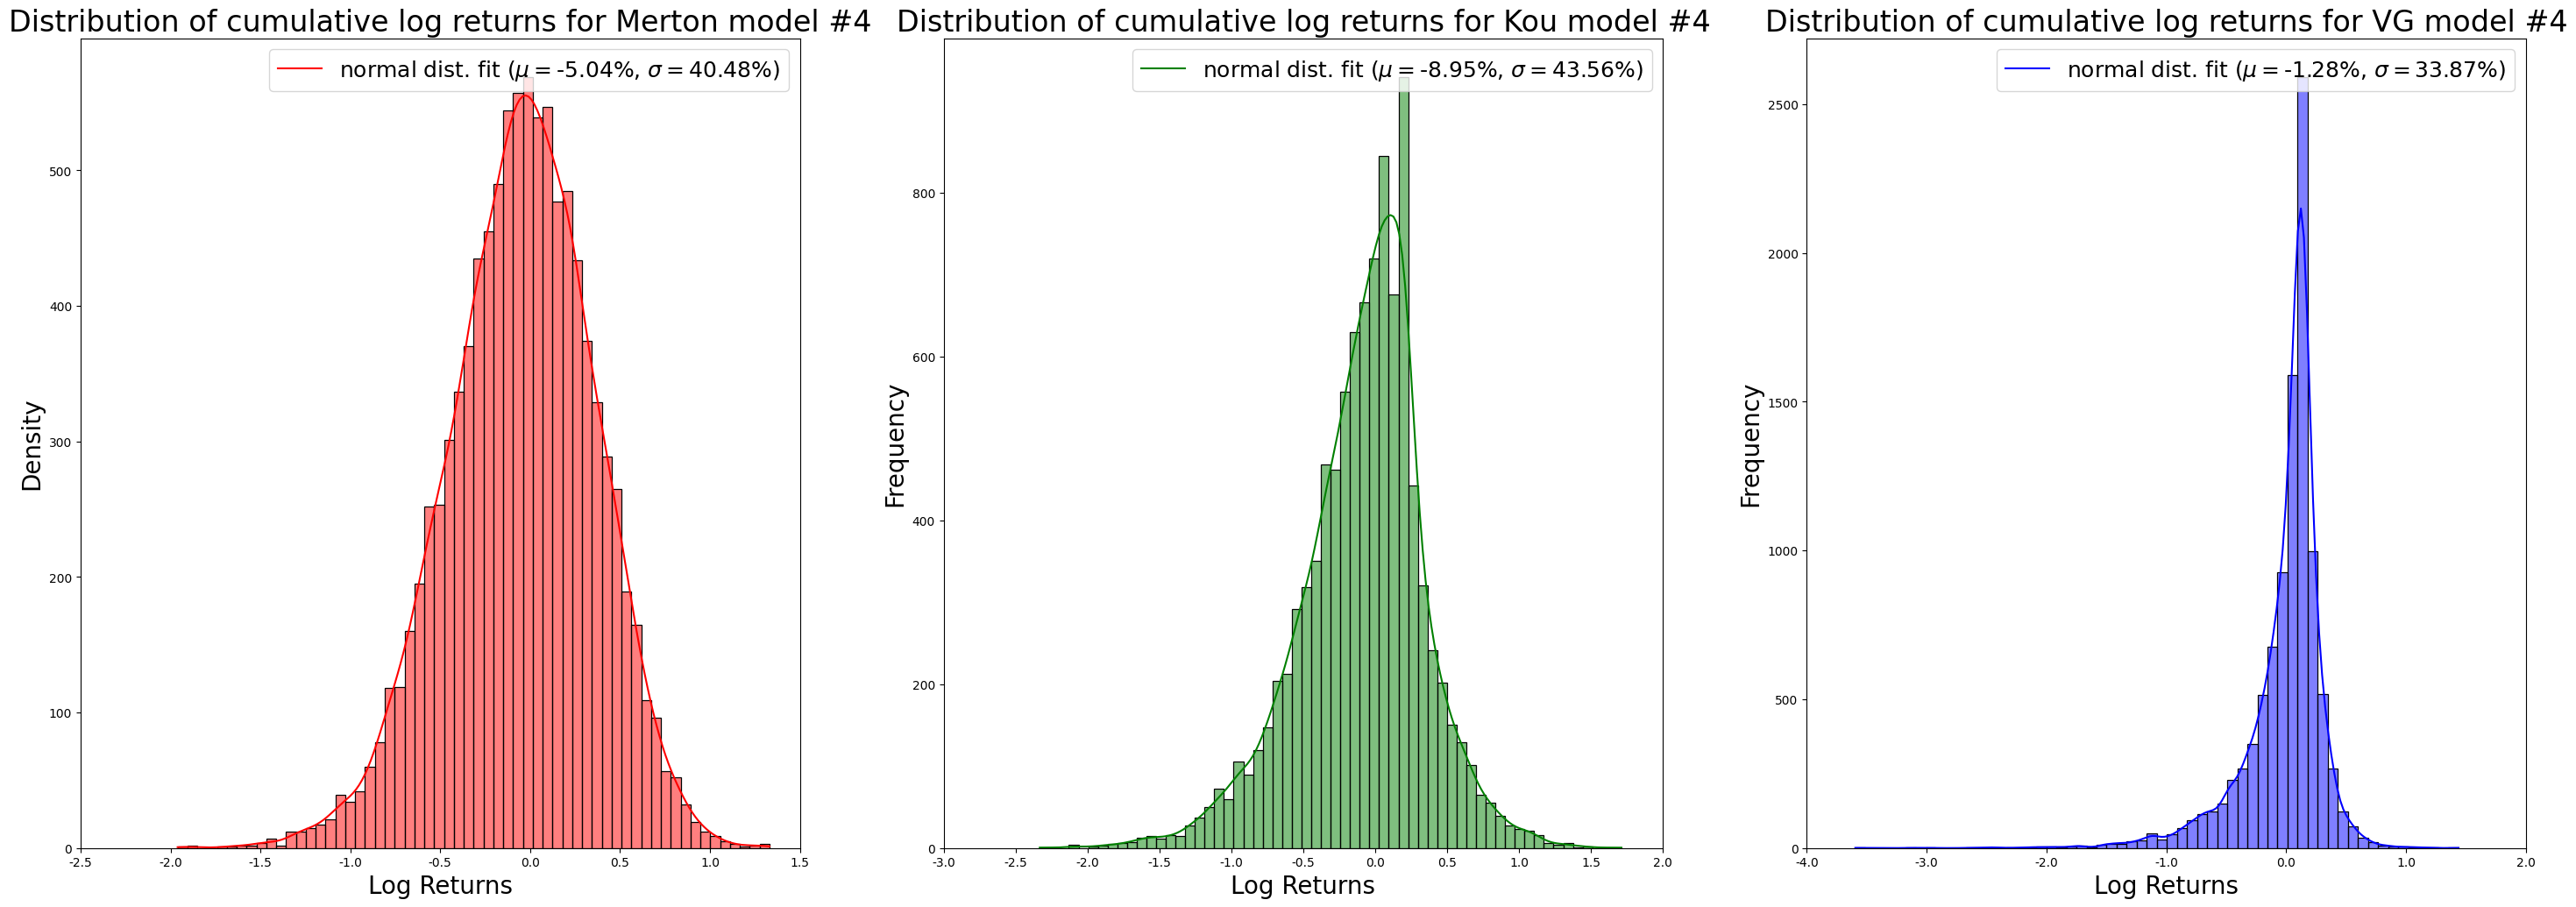

In [131]:
log_returns_mert4 = np.log(Smert4[1:, :] / Smert4[:-1, :])
lr_mert4_flattened = log_returns_mert4.flatten()
log_returns_kou4 = np.log(Skou4[1:, :] / Skou4[:-1, :])
lr_kou4_flattened = log_returns_kou4.flatten()
log_returns_vg4 = np.log(Svg4[1:, :] / Svg4[:-1, :])
lr_vg4_flattened = log_returns_vg4.flatten()

cum_log_returns_mert4 = np.cumsum(log_returns_mert4, axis=0)[-1, :]
cum_log_returns_kou4 = np.cumsum(log_returns_kou4, axis=0)[-1, :]
cum_log_returns_vg4 = np.cumsum(log_returns_vg4, axis=0)[-1, :]
fig, ax = plt.subplots(ncols=3, figsize=(36, 12))

# fit a dist plot
sns.histplot(cum_log_returns_mert4, ax=ax[0], bins=60, kde=True, color='red')
sns.histplot(cum_log_returns_kou4, ax=ax[1], bins=60, kde=True, color='green')
sns.histplot(cum_log_returns_vg4, ax=ax[2], bins=60, kde=True, color='blue')
print("Cumulative Log Returns. Model parameters calibrated on the MIXED SET of OPTIONS: EUROPEAN VANILLA AND OTKO")

# compute the params of the fitted normal curve
(mu, s) = stats.norm.fit(cum_log_returns_mert4)  #, color='red', linewidth = 20)
ax[0].set_title('Distribution of cumulative log returns for Merton model #4', fontsize=24)
ax[0].set_xlabel('Log Returns', fontsize=20)
ax[0].set_ylabel('Density', fontsize=20)
ax[0].set_xticks(ax[0].get_xticks())
ax[0].set_xticklabels(['{:,.1f}'.format(x) for x in ax[0].get_xticks()])
ax[0].legend(["normal dist. fit ($\mu=${0:,.2%}, $\sigma=${1:,.2%})".format(mu, s)], fontsize=18)

# compute the params of the fitted normal curve
(mu, s) = stats.norm.fit(cum_log_returns_kou4)
ax[1].set_title('Distribution of cumulative log returns for Kou model #4', fontsize=24)
ax[1].set_xlabel('Log Returns', fontsize=20)
ax[1].set_ylabel('Frequency', fontsize=20)
ax[1].set_xticks(ax[1].get_xticks())
ax[1].set_xticklabels(['{:,.1f}'.format(x) for x in ax[1].get_xticks()])
ax[1].legend(["normal dist. fit ($\mu=${0:,.2%}, $\sigma=${1:,.2%})".format(mu, s)], fontsize=18)

# compute the params of the fitted normal curve
(mu, s) = stats.norm.fit(cum_log_returns_vg4)
ax[2].set_title('Distribution of cumulative log returns for VG model #4', fontsize=24)
ax[2].set_xlabel('Log Returns', fontsize=20)
ax[2].set_ylabel('Frequency', fontsize=20)
ax[2].set_xticks(ax[2].get_xticks())
ax[2].set_xticklabels(['{:,.1f}'.format(x) for x in ax[2].get_xticks()])
ax[2].legend(["normal dist. fit ($\mu=${0:,.2%}, $\sigma=${1:,.2%})".format(mu, s)], fontsize=18)